# Decision Tree Model

In [851]:
import pandas as pd

from sklearn.preprocessing import MinMaxScaler

from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import numpy as np

from sklearn.tree import DecisionTreeClassifier 

from sklearn.metrics import classification_report

from sklearn.tree import plot_tree

from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

In [852]:
df = pd.read_csv("UBS_Cleaned_Date.csv").iloc[2:, :].reset_index(drop = True)
df.head()

,date,UBS_x,UBS Financial Services Inc.,UBS Investment Bank,UBS Global Wealth Management,UBS Asset Management,Open,High,Low,Close,...,Dow_EMA_Move,Dow_EMA_Move_5,Dow_Disparity_Move,Dow_Disparity_s_Move,Dow_RSI_Move,target_1,target_2,target_3,target_4,target_5
0,2019-01-04,14.791667,0.0,0.0,0.0,0.0,10.734068,10.937397,10.687472,10.878093,...,1,1,1,1,0,0,1,1,1,1
1,2019-01-07,12.208333,0.0,0.0,0.0,0.0,10.878092,11.056005,10.823024,10.988229,...,1,1,1,0,0,1,1,1,1,0
2,2019-01-08,2.333333,0.0,0.0,0.0,0.0,11.047532,11.089893,10.945868,11.013644,...,1,1,0,1,0,1,1,0,0,1
3,2019-01-09,9.083333,0.0,0.0,0.0,0.0,11.081421,11.132253,10.954340,10.979756,...,1,1,0,1,0,1,0,1,1,0
4,2019-01-10,6.416667,0.0,0.0,0.0,0.0,11.030590,11.157670,11.022117,11.098366,...,1,1,1,0,0,0,1,1,1,0


# Target_1

In [853]:
# Basic Varaibles,  
df = df[["date", "Change_Close",
            "Wiki_RSI_Move", "Dow_Disparity_Move", 
            "Wiki_MAvg_Move", "Nas_Move",
            "Google_rs", "Google_ROC_Move", 
            "Nas_Disparity_Move", "Google_Disparity_s_Move",
            "Nas_Disparity_s_Move", "Google_gain",
            "Dow_Disparity_s_Move", "Google_RSI_Move", "Google_diff",
            "Dow_Move", "Google_Moment_2_s", "Dow_Rocp", "Nas_gain",
            "Wiki_Disparity_s", "Nas_MAvg_s_Move", "Google_Move",
            "Google_Disparity_s", "Google_total", "UBS_y", "Google_Rocp",
            "target_1"
            ]]
df.head()

,date,Change_Close,Wiki_RSI_Move,Dow_Disparity_Move,Wiki_MAvg_Move,Nas_Move,Google_rs,Google_ROC_Move,Nas_Disparity_Move,Google_Disparity_s_Move,...,Dow_Rocp,Nas_gain,Wiki_Disparity_s,Nas_MAvg_s_Move,Google_Move,Google_Disparity_s,Google_total,UBS_y,Google_Rocp,target_1
0,2019-01-04,0.110136,0,1,1,1,NaN,0,1,0,...,NaN,275.36,100.840149,1,0,99.457627,1467.0,1467,NaN,0
1,2019-01-07,0.025415,0,1,1,1,NaN,0,1,1,...,NaN,84.61,100.000000,1,1,100.000000,2017.0,2017,NaN,1
2,2019-01-08,-0.033888,0,0,1,1,NaN,0,0,1,...,NaN,73.53,101.004938,1,1,100.148515,2023.0,2023,NaN,1
3,2019-01-09,0.118609,0,0,1,1,NaN,0,0,0,...,44.81153,60.08,98.755994,1,0,99.370965,2001.0,2001,3.340568,1
4,2019-01-10,0.067777,0,1,0,1,NaN,0,1,1,...,18.24271,28.99,96.235749,1,1,100.165536,2017.0,2017,4.375271,0


In [854]:
pd.DataFrame(df.isna().sum()).T

,date,Change_Close,Wiki_RSI_Move,Dow_Disparity_Move,Wiki_MAvg_Move,Nas_Move,Google_rs,Google_ROC_Move,Nas_Disparity_Move,Google_Disparity_s_Move,...,Dow_Rocp,Nas_gain,Wiki_Disparity_s,Nas_MAvg_s_Move,Google_Move,Google_Disparity_s,Google_total,UBS_y,Google_Rocp,target_1
0,0,1,0,0,0,0,44,0,0,0,...,3,0,18,0,0,18,18,0,26,0


### Cleaning NaN issue

In [855]:
df = df.dropna() # to remove NaN
df = df[~(df.isin([np.inf, -np.inf]).any(axis=1))] # to remove inf


# Train/test split

In [856]:
X = df.iloc[:, 2:-1]
Y = df.iloc[:, -1]

In [857]:
def dataset_split(X, Y, test_size):
    ind = int((1 - test_size) * len(X))
    X_train = X.iloc[:ind, :]
    X_test = X.iloc[ind:, :]
    Y_train = Y.iloc[:ind]
    Y_test = Y.iloc[ind:]
    return X_train, X_test, Y_train, Y_test, ind

In [858]:
X_train, X_test, Y_train, Y_test, split_ind = dataset_split(X, Y, test_size = 0.2)

# Analyze the balance of the classification problem<br>
i.e. the percentage of 1s and 0s in the target

In [859]:
counts = Y_train.groupby(by = Y_train).count()
counts = pd.Series(counts)
print(counts)

target_1
0    276
1    332
Name: target_1, dtype: int64


# Feature scaling

In [860]:
# Scale the data (prices) from 0 to 1

scaler = MinMaxScaler()
X_train_sc = pd.DataFrame(scaler.fit_transform(X_train), columns = X.columns)
X_test_sc = pd.DataFrame(scaler.transform(X_test), columns = X.columns)

In [861]:
# Each feature's correlation with every other feature

corr_matrix = X_train_sc.corr()

In [862]:
corr_matrix

,Wiki_RSI_Move,Dow_Disparity_Move,Wiki_MAvg_Move,Nas_Move,Google_rs,Google_ROC_Move,Nas_Disparity_Move,Google_Disparity_s_Move,Nas_Disparity_s_Move,Google_gain,...,Google_Moment_2_s,Dow_Rocp,Nas_gain,Wiki_Disparity_s,Nas_MAvg_s_Move,Google_Move,Google_Disparity_s,Google_total,UBS_y,Google_Rocp
Wiki_RSI_Move,1.000000,-0.047694,0.046228,-0.061170,-0.053431,0.038020,-0.037231,0.066725,-0.069789,0.044756,...,0.009199,-0.029652,-0.048873,0.093833,-0.017207,0.027634,0.026367,0.049264,0.049293,0.075623
Dow_Disparity_Move,-0.047694,1.000000,-0.054396,0.447138,-0.014792,0.012292,0.581776,-0.071199,0.441297,-0.034588,...,-0.015004,-0.052947,0.405029,-0.022732,0.250198,-0.068255,-0.045508,-0.028126,-0.028109,0.040855
Wiki_MAvg_Move,0.046228,-0.054396,1.000000,-0.009796,-0.174453,0.097223,-0.045076,0.068350,-0.012626,0.154983,...,0.261071,-0.025434,0.012570,0.415801,-0.020776,0.134522,0.248110,0.194756,0.194785,-0.057734
Nas_Move,-0.061170,0.447138,-0.009796,1.000000,0.017679,-0.007936,0.659986,-0.054742,0.613634,-0.031306,...,-0.001055,-0.034603,0.549680,0.015481,0.637119,-0.066545,-0.053795,-0.049515,-0.049551,0.025218
Google_rs,-0.053431,-0.014792,-0.174453,0.017679,1.000000,-0.134578,0.004268,-0.135857,-0.004372,-0.599276,...,-0.552381,0.008521,0.010731,-0.181715,0.033443,-0.197187,-0.343153,-0.711679,-0.711747,-0.041980
Google_ROC_Move,0.038020,0.012292,0.097223,-0.007936,-0.134578,1.000000,-0.017637,0.455830,-0.019454,0.328585,...,0.160075,0.038617,-0.025321,0.185028,0.054210,0.512611,0.392038,0.196864,0.196694,0.114350
Nas_Disparity_Move,-0.037231,0.581776,-0.045076,0.659986,0.004268,-0.017637,1.000000,-0.074095,0.616031,-0.069467,...,-0.040587,-0.058976,0.516259,-0.006170,0.323571,-0.092138,-0.088697,-0.082765,-0.082806,0.017539
Google_Disparity_s_Move,0.066725,-0.071199,0.068350,-0.054742,-0.135857,0.455830,-0.074095,1.000000,-0.072861,0.364499,...,0.052311,-0.023387,-0.047247,0.193507,-0.023498,0.749488,0.424771,0.179664,0.179659,0.037909
Nas_Disparity_s_Move,-0.069789,0.441297,-0.012626,0.613634,-0.004372,-0.019454,0.616031,-0.072861,1.000000,-0.002538,...,0.040364,-0.058693,0.444735,-0.001350,0.261168,-0.078429,-0.048603,-0.019173,-0.019287,-0.009470
Google_gain,0.044756,-0.034588,0.154983,-0.031306,-0.599276,0.328585,-0.069467,0.364499,-0.002538,1.000000,...,0.593622,0.025668,-0.034685,0.347866,-0.047119,0.436081,0.577142,0.764238,0.764226,0.035678


In [863]:
#Each feature's correlation with the target variable

feature_target_corr = X_train_sc.corrwith(Y_train, method = "pearson")
feature_target_corr = feature_target_corr.sort_values(ascending = False)

In [864]:
feature_target_corr

Google_ROC_Move            0.101909
Google_Disparity_s_Move    0.053747
Dow_Disparity_s_Move       0.047074
Google_Rocp                0.042224
Dow_Move                   0.041739
Google_diff                0.037843
Google_Move                0.033798
Nas_Disparity_Move         0.031645
Wiki_MAvg_Move             0.031645
Dow_Disparity_Move         0.026992
Google_gain                0.023493
Wiki_Disparity_s           0.020055
Nas_Disparity_s_Move       0.015594
Google_total               0.013930
UBS_y                      0.013793
Wiki_RSI_Move              0.002815
Nas_MAvg_s_Move            0.002444
Google_RSI_Move            0.000281
Nas_Move                  -0.000570
Google_Moment_2_s         -0.003125
Google_rs                 -0.013707
Google_Disparity_s        -0.016687
Nas_gain                  -0.045553
Dow_Rocp                  -0.049096
dtype: float64

# Select features based on correlation

In [865]:
all_features = X.columns.to_list()
selected_features = all_features[:]
for i in range(0, len(corr_matrix)):
    for j in range(i, len(corr_matrix)):
        # Process every pair of features
        corr = corr_matrix.iloc[i, j] 
        if abs(corr) > 0.5 and corr != 1:
            feature1 = all_features[i]
            feature2 = all_features[j]
            
            # Out of the two features in the current pair, remove the feature that
            # is less correlated with the target variable
            corr1 = feature_target_corr[feature1]
            corr2 = feature_target_corr[feature2]
            try:
                if abs(corr1) < abs(corr2):
                    selected_features.remove(feature1)
                    print("Removed from list of features:", feature1)
                else:
                    selected_features.remove(feature2)
                    print("Removed from list of features:", feature2)
            except ValueError:
                # Catch the error just in case we're trying to remove a feature
                # that's already been removed
                pass

Removed from list of features: Dow_Disparity_Move
Removed from list of features: Nas_Move
Removed from list of features: Google_rs
Removed from list of features: Google_Moment_2_s
Removed from list of features: Google_Move
Removed from list of features: Nas_Disparity_s_Move
Removed from list of features: Nas_Disparity_Move
Removed from list of features: Google_diff
Removed from list of features: Google_gain
Removed from list of features: Google_Disparity_s
Removed from list of features: Google_total
Removed from list of features: UBS_y
Removed from list of features: Dow_Move


In [866]:
# After our function, X_train_sc, removes the least correlated fetures from X_train_sc to target_1, we proceed with the training

X_train_tr = X_train_sc[selected_features]
X_test_tr = X_test_sc[selected_features]

In [867]:
X_train_tr.head()

,Wiki_RSI_Move,Wiki_MAvg_Move,Google_ROC_Move,Google_Disparity_s_Move,Dow_Disparity_s_Move,Google_RSI_Move,Dow_Rocp,Nas_gain,Wiki_Disparity_s,Nas_MAvg_s_Move,Google_Rocp
0,0.0,0.0,0.0,0.0,1.0,0.0,0.878149,0.008038,0.315919,1.0,0.238957
1,0.0,0.0,0.0,0.0,0.0,1.0,0.878642,0.070853,0.254159,1.0,0.230565
2,1.0,0.0,1.0,0.0,1.0,0.0,0.878564,0.135794,0.273894,1.0,0.230504
3,1.0,0.0,1.0,1.0,0.0,1.0,0.874124,0.000000,0.328661,0.0,0.220018
4,1.0,1.0,0.0,1.0,1.0,0.0,0.880138,0.000000,0.448890,0.0,0.230502


In [868]:
corr_matrix_selected_features = X_train_tr.corr()

# Plot number of components vs. explained variance for PCA algorithm

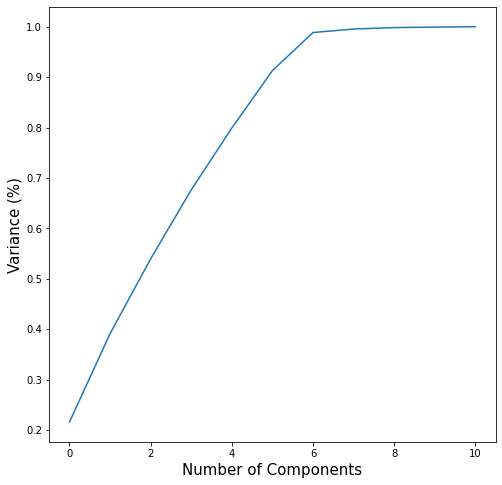

In [869]:
pca = PCA().fit(X_train_tr)
plt.figure(figsize=(8,8))
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('Number of Components', fontsize=(15))
plt.ylabel('Variance (%)', fontsize=(15)) # for each component
plt.show()

# Run PCA algorithm (the optimal number of components is wherever the elbow in the graph occurs)

In [870]:
pca = PCA(n_components = 6).fit(X_train_tr.to_numpy())
X_train_pca = pca.transform(X_train_tr.to_numpy())
X_test_pca = pca.transform(X_test_tr.to_numpy())

# Model =======================================================================================

In [871]:
model = DecisionTreeClassifier(max_depth = 4, random_state = 0)
model.fit(X_train_pca, Y_train)

DecisionTreeClassifier(max_depth=4, random_state=0)

### Make predictions

In [872]:
Y_test_pred = pd.Series(model.predict(X_test_pca)).astype(int)
Y_train_pred = pd.Series(model.predict(X_train_pca)).astype(int)

In [873]:
report = classification_report(Y_test_pred, Y_test, target_names = ["be flat", "be long"], output_dict = True)
report = pd.DataFrame(report).T
print(report)
print("")

              precision    recall  f1-score     support
be flat        0.093750  0.500000  0.157895   12.000000
be long        0.932584  0.588652  0.721739  141.000000
accuracy       0.581699  0.581699  0.581699    0.581699
macro avg      0.513167  0.544326  0.439817  153.000000
weighted avg   0.866793  0.581699  0.677516  153.000000



### Tree diagram

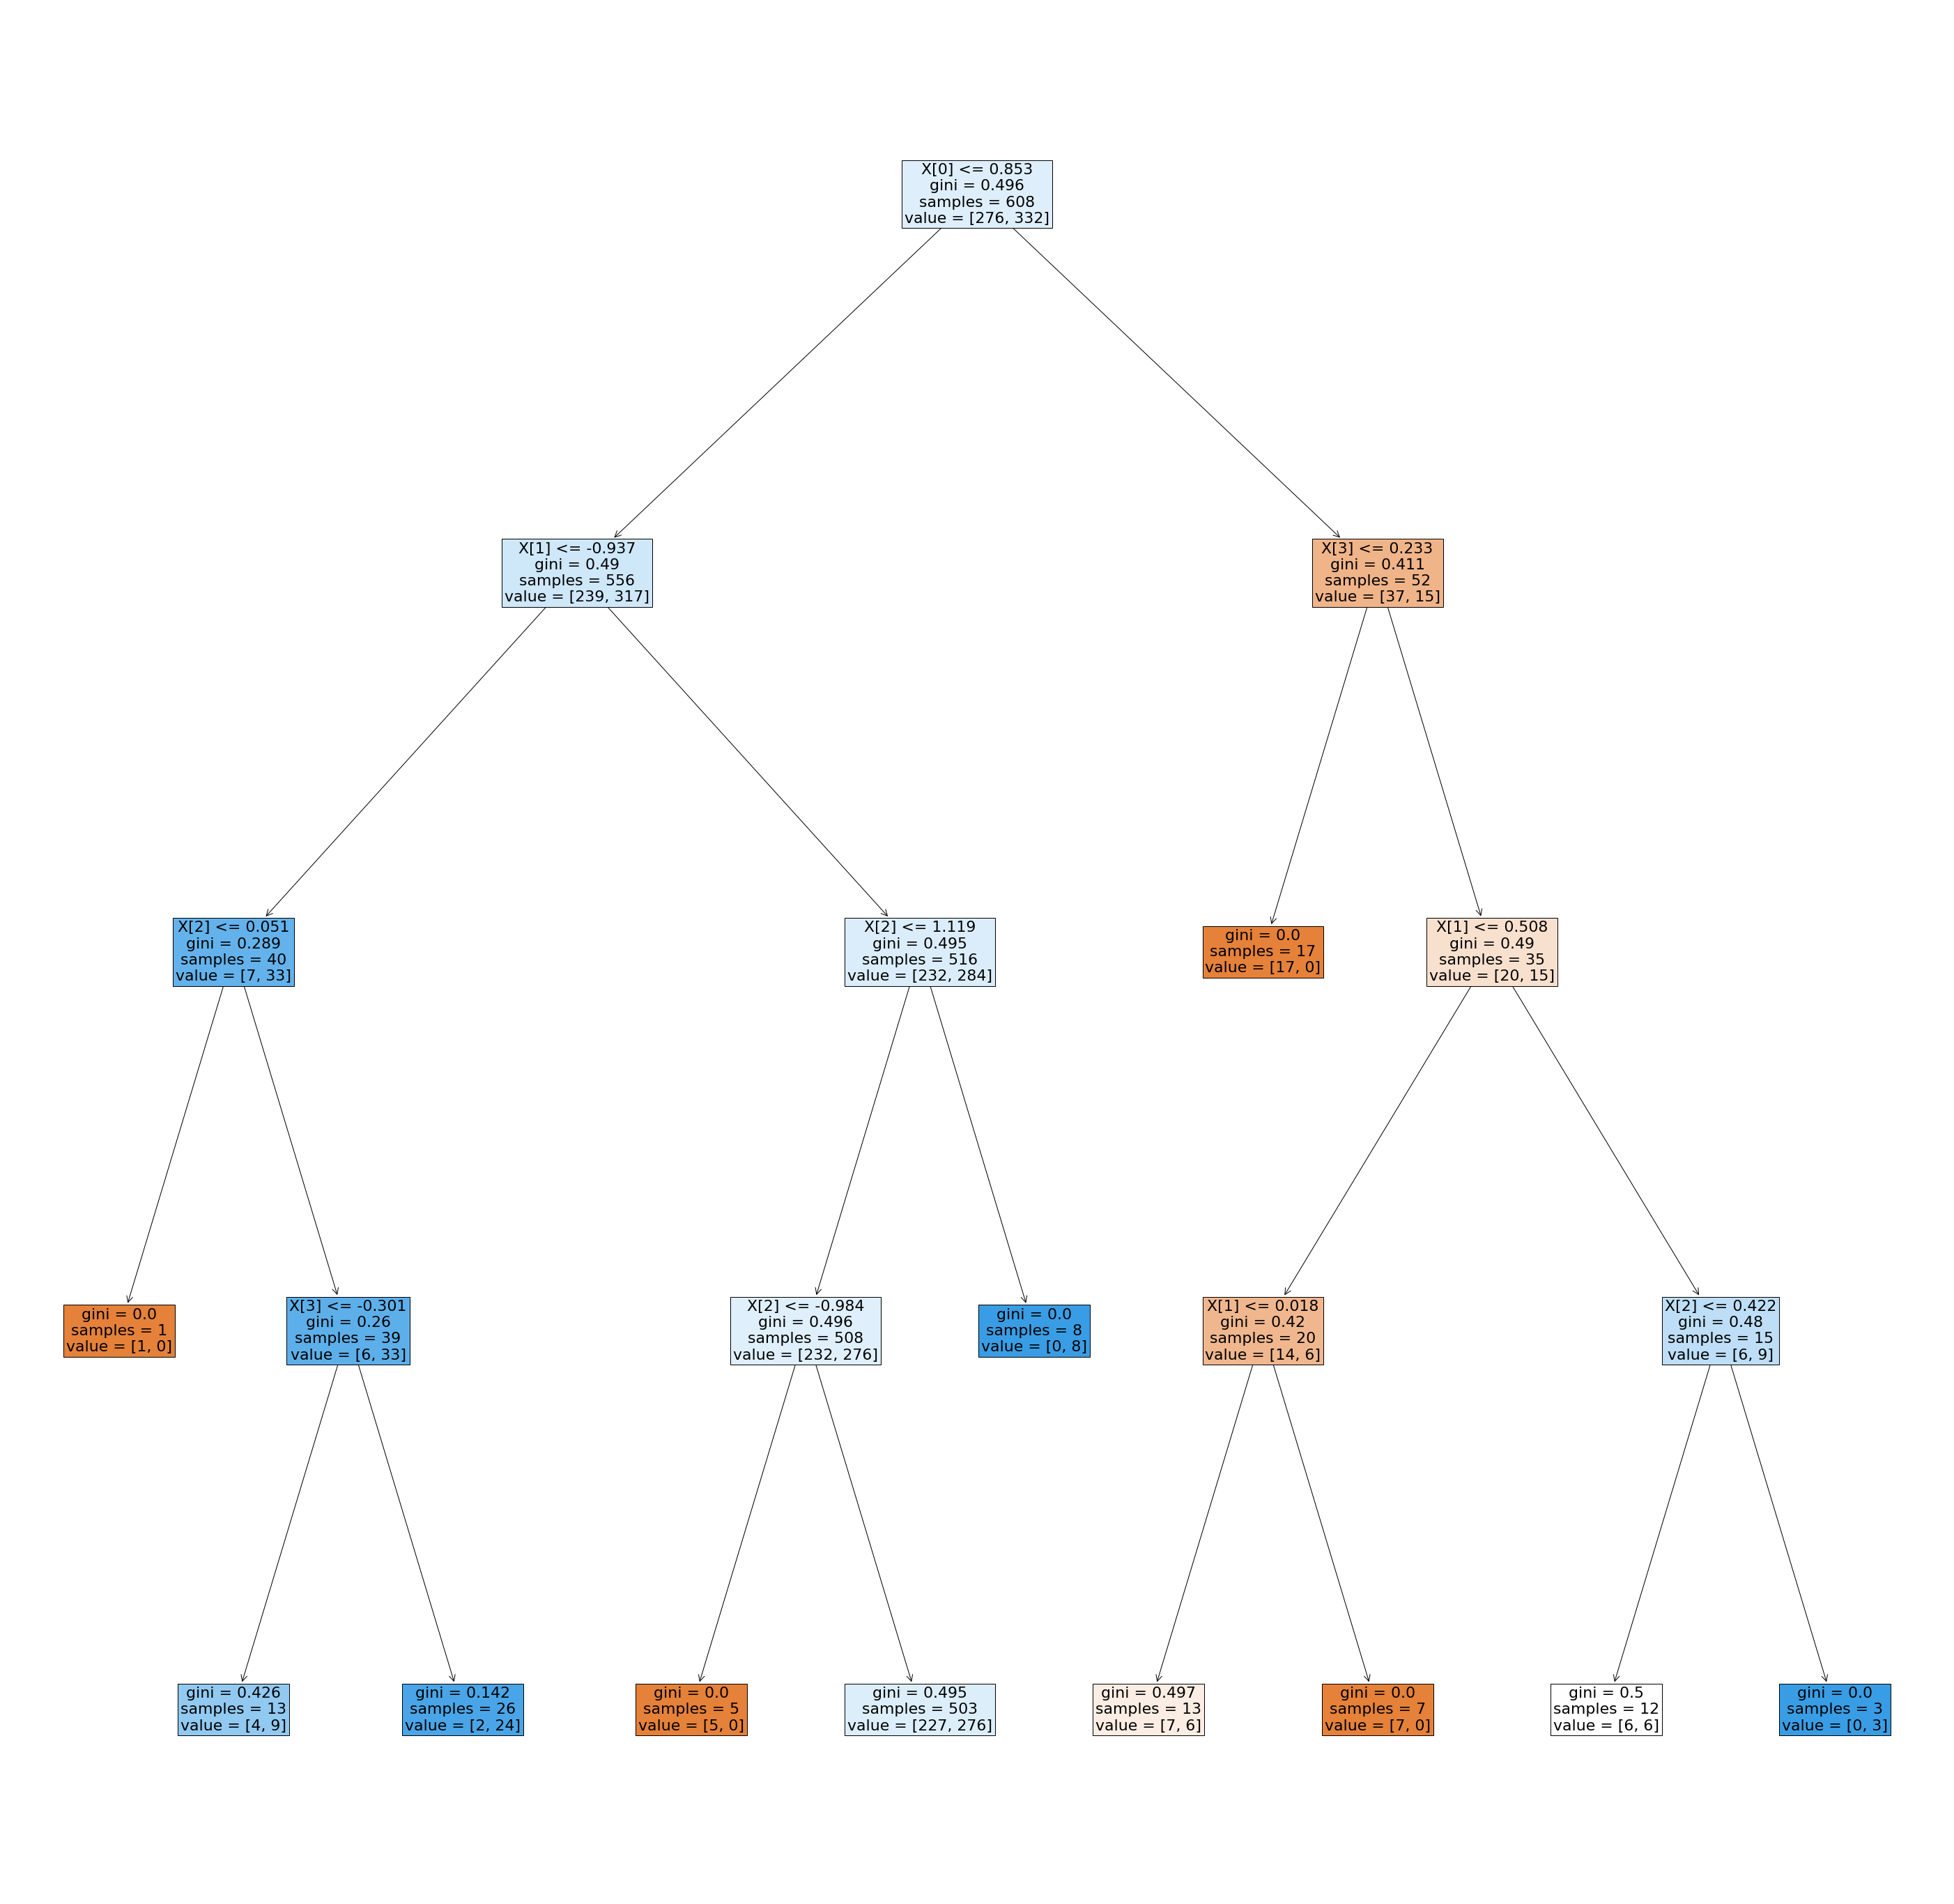

In [874]:
fig, ax = plt.subplots(figsize=(50,50))
plot_tree(model, ax = plt.axes(), fontsize=22, filled=True)
plt.show()

### Evaluate model and print metrics

In [875]:
metrics = \
[ \
[accuracy_score(Y_train, Y_train_pred), accuracy_score(Y_test, Y_test_pred)],
[precision_score(Y_train, Y_train_pred), precision_score(Y_test, Y_test_pred)], [recall_score(Y_train, Y_train_pred), recall_score(Y_test, Y_test_pred)],
[f1_score(Y_train, Y_train_pred), f1_score(Y_test, Y_test_pred)]
]
metrics = np.array(metrics) * 100

In [876]:
metrics = pd.DataFrame(metrics, columns = ["Training Set", "Test Set"])
metrics.insert(0, "Metric", ["Accuracy", "Precision", "Recall", "F1 Score"])
metrics.set_index("Metric", inplace = True)
print(metrics)

           Training Set   Test Set
Metric                            
Accuracy      59.703947  58.169935
Precision     57.866184  58.865248
Recall        96.385542  93.258427
F1 Score      72.316384  72.173913


# Target_2

In [877]:
df = pd.read_csv("UBS_Cleaned_Date.csv").iloc[2:, :].reset_index(drop = True)

In [878]:
# Basic Varaibles,  
df = df[["date", "Change_Close",
            "Wiki_RSI_Move", "Dow_Disparity_Move", 
            "Wiki_MAvg_Move", "Nas_Move",
            "Google_rs", "Google_ROC_Move", 
            "Nas_Disparity_Move", "Google_Disparity_s_Move",
            "Nas_Disparity_s_Move", "Google_gain",
            "Dow_Disparity_s_Move", "Google_RSI_Move", "Google_diff",
            "Dow_Move", "Google_Moment_2_s", "Dow_Rocp", "Nas_gain",
            "Wiki_Disparity_s", "Nas_MAvg_s_Move", "Google_Move",
            "Google_Disparity_s", "Google_total", "UBS_y", "Google_Rocp",
            "target_2"
            ]]
df.head()

,date,Change_Close,Wiki_RSI_Move,Dow_Disparity_Move,Wiki_MAvg_Move,Nas_Move,Google_rs,Google_ROC_Move,Nas_Disparity_Move,Google_Disparity_s_Move,...,Dow_Rocp,Nas_gain,Wiki_Disparity_s,Nas_MAvg_s_Move,Google_Move,Google_Disparity_s,Google_total,UBS_y,Google_Rocp,target_2
0,2019-01-04,0.110136,0,1,1,1,NaN,0,1,0,...,NaN,275.36,100.840149,1,0,99.457627,1467.0,1467,NaN,1
1,2019-01-07,0.025415,0,1,1,1,NaN,0,1,1,...,NaN,84.61,100.000000,1,1,100.000000,2017.0,2017,NaN,1
2,2019-01-08,-0.033888,0,0,1,1,NaN,0,0,1,...,NaN,73.53,101.004938,1,1,100.148515,2023.0,2023,NaN,1
3,2019-01-09,0.118609,0,0,1,1,NaN,0,0,0,...,44.81153,60.08,98.755994,1,0,99.370965,2001.0,2001,3.340568,0
4,2019-01-10,0.067777,0,1,0,1,NaN,0,1,1,...,18.24271,28.99,96.235749,1,1,100.165536,2017.0,2017,4.375271,1


In [879]:
pd.DataFrame(df.isna().sum()).T

,date,Change_Close,Wiki_RSI_Move,Dow_Disparity_Move,Wiki_MAvg_Move,Nas_Move,Google_rs,Google_ROC_Move,Nas_Disparity_Move,Google_Disparity_s_Move,...,Dow_Rocp,Nas_gain,Wiki_Disparity_s,Nas_MAvg_s_Move,Google_Move,Google_Disparity_s,Google_total,UBS_y,Google_Rocp,target_2
0,0,1,0,0,0,0,44,0,0,0,...,3,0,18,0,0,18,18,0,26,0


### Cleaning NaN issue

In [880]:
df = df.dropna() # to remove NaN
df = df[~(df.isin([np.inf, -np.inf]).any(axis=1))] # to remove inf


# Train/test split

In [881]:
X = df.iloc[:, 2:-1]
Y = df.iloc[:, -1]

In [882]:
def dataset_split(X, Y, test_size):
    ind = int((1 - test_size) * len(X))
    X_train = X.iloc[:ind, :]
    X_test = X.iloc[ind:, :]
    Y_train = Y.iloc[:ind]
    Y_test = Y.iloc[ind:]
    return X_train, X_test, Y_train, Y_test, ind

In [883]:
X_train, X_test, Y_train, Y_test, split_ind = dataset_split(X, Y, test_size = 0.2)

# Analyze the balance of the classification problem<br>
i.e. the percentage of 1s and 0s in the target

In [884]:
counts = Y_train.groupby(by = Y_train).count()
counts = pd.Series(counts)
print(counts)

target_2
0    282
1    326
Name: target_2, dtype: int64


# Feature scaling

In [885]:
# Scale the data (prices) from 0 to 1

scaler = MinMaxScaler()
X_train_sc = pd.DataFrame(scaler.fit_transform(X_train), columns = X.columns)
X_test_sc = pd.DataFrame(scaler.transform(X_test), columns = X.columns)

In [886]:
# Each feature's correlation with every other feature

corr_matrix = X_train_sc.corr()

In [887]:
#Each feature's correlation with the target variable

feature_target_corr = X_train_sc.corrwith(Y_train, method = "pearson")
feature_target_corr = feature_target_corr.sort_values(ascending = False)

# Select features based on correlation

In [888]:
all_features = X.columns.to_list()
selected_features = all_features[:]
for i in range(0, len(corr_matrix)):
    for j in range(i, len(corr_matrix)):
        # Process every pair of features
        corr = corr_matrix.iloc[i, j] 
        if abs(corr) > 0.5 and corr != 1:
            feature1 = all_features[i]
            feature2 = all_features[j]
            
            # Out of the two features in the current pair, remove the feature that
            # is less correlated with the target variable
            corr1 = feature_target_corr[feature1]
            corr2 = feature_target_corr[feature2]
            try:
                if abs(corr1) < abs(corr2):
                    selected_features.remove(feature1)
                    print("Removed from list of features:", feature1)
                else:
                    selected_features.remove(feature2)
                    print("Removed from list of features:", feature2)
            except ValueError:
                # Catch the error just in case we're trying to remove a feature
                # that's already been removed
                pass

Removed from list of features: Nas_Disparity_Move
Removed from list of features: Dow_Disparity_s_Move
Removed from list of features: Dow_Move
Removed from list of features: Nas_Disparity_s_Move
Removed from list of features: Nas_gain
Removed from list of features: Nas_Move
Removed from list of features: Google_rs
Removed from list of features: Google_total
Removed from list of features: UBS_y
Removed from list of features: Google_Move
Removed from list of features: Google_diff
Removed from list of features: Google_Moment_2_s
Removed from list of features: Google_Disparity_s


In [889]:
# After our function, X_train_sc, removes the least correlated fetures from X_train_sc to target_1, we proceed with the training

X_train_tr = X_train_sc[selected_features]
X_test_tr = X_test_sc[selected_features]

In [890]:
corr_matrix_selected_features = X_train_tr.corr()

# Plot number of components vs. explained variance for PCA algorithm

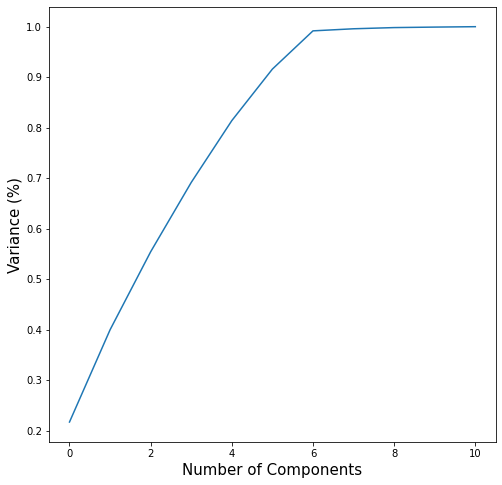

In [891]:
pca = PCA().fit(X_train_tr)
plt.figure(figsize=(8,8))
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('Number of Components', fontsize=(15))
plt.ylabel('Variance (%)', fontsize=(15)) # for each component
plt.show()

# Run PCA algorithm (the optimal number of components is wherever the elbow in the graph occurs)

In [892]:
pca = PCA(n_components = 6).fit(X_train_tr.to_numpy())
X_train_pca = pca.transform(X_train_tr.to_numpy())
X_test_pca = pca.transform(X_test_tr.to_numpy())

# Model =======================================================================================

In [893]:
model = DecisionTreeClassifier(max_depth = 4, random_state = 0)
model.fit(X_train_pca, Y_train)

DecisionTreeClassifier(max_depth=4, random_state=0)

### Make predictions

In [894]:
Y_test_pred = pd.Series(model.predict(X_test_pca)).astype(int)
Y_train_pred = pd.Series(model.predict(X_train_pca)).astype(int)

In [895]:
report = classification_report(Y_test_pred, Y_test, target_names = ["be flat", "be long"], output_dict = True)
report = pd.DataFrame(report).T
print(report)
print("")

              precision    recall  f1-score     support
be flat        0.507463  0.566667  0.535433   60.000000
be long        0.697674  0.645161  0.670391   93.000000
accuracy       0.614379  0.614379  0.614379    0.614379
macro avg      0.602569  0.605914  0.602912  153.000000
weighted avg   0.623082  0.614379  0.617466  153.000000



### Tree diagram

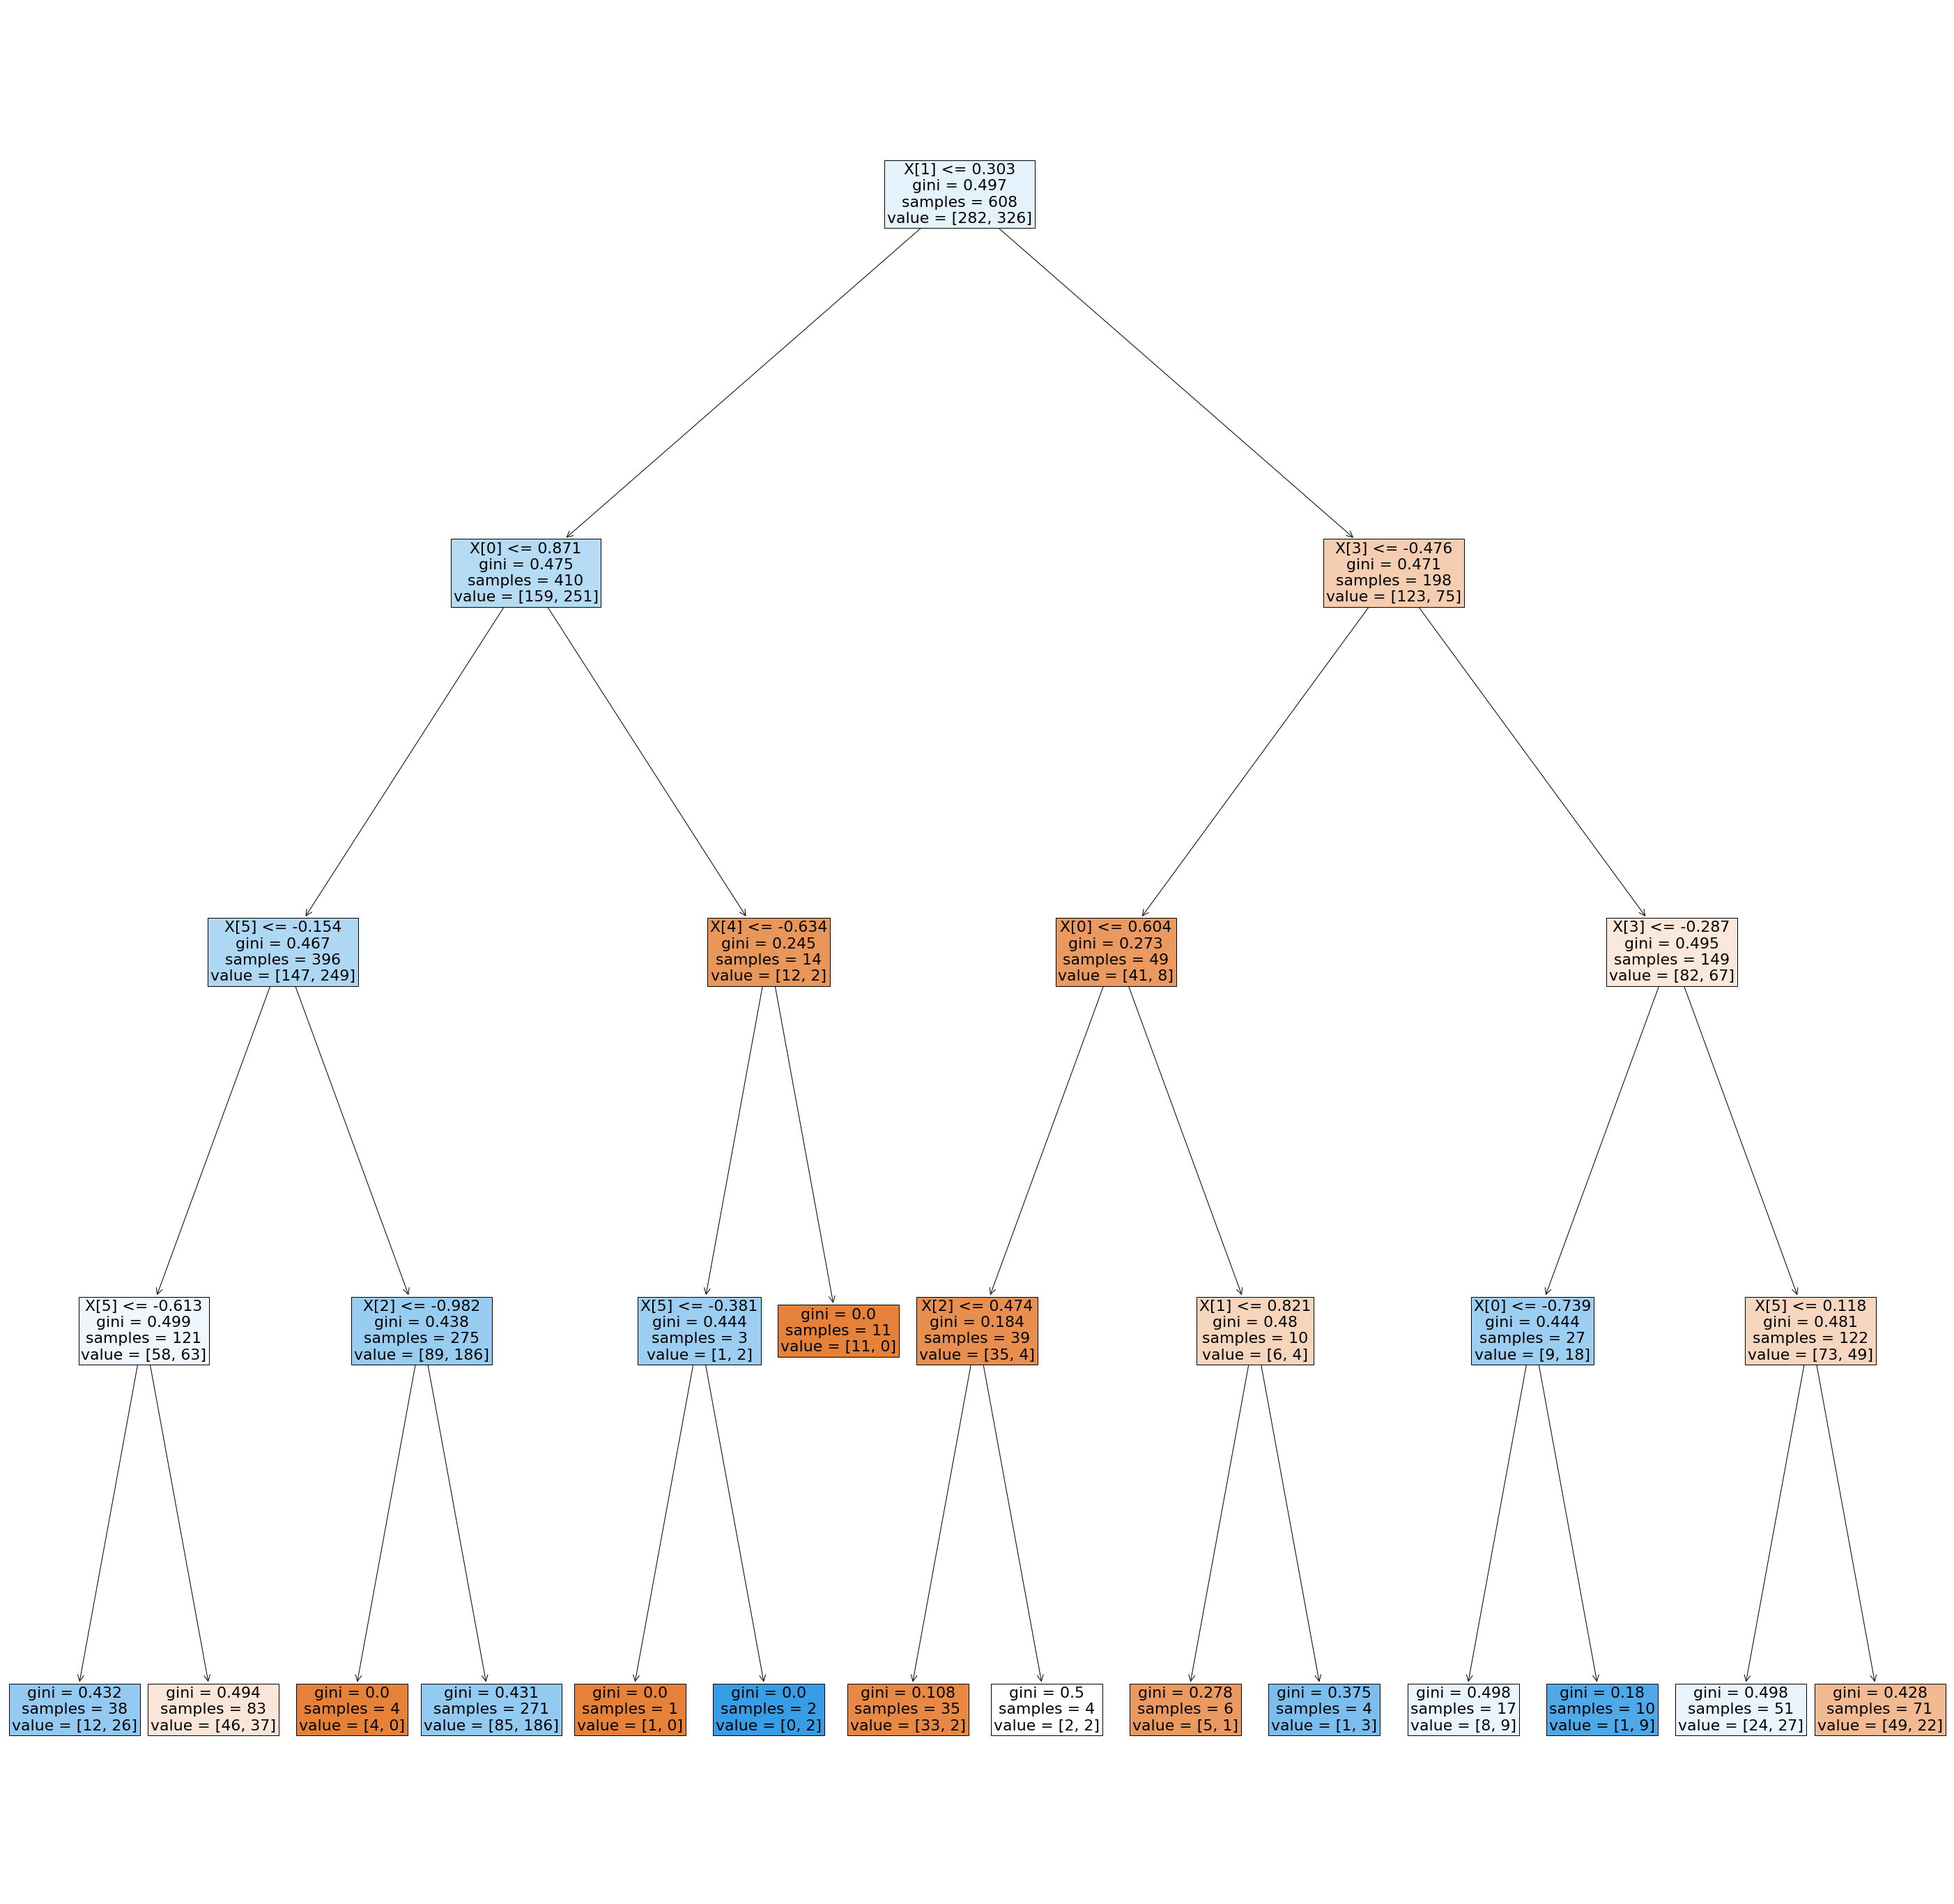

In [896]:
fig, ax = plt.subplots(figsize=(50,50))
plot_tree(model, ax = plt.axes(), fontsize=22, filled=True)
plt.show()

### Evaluate model and print metrics

In [897]:
metrics = \
[ \
[accuracy_score(Y_train, Y_train_pred), accuracy_score(Y_test, Y_test_pred)],
[precision_score(Y_train, Y_train_pred), precision_score(Y_test, Y_test_pred)], [recall_score(Y_train, Y_train_pred), recall_score(Y_test, Y_test_pred)],
[f1_score(Y_train, Y_train_pred), f1_score(Y_test, Y_test_pred)]
]
metrics = np.array(metrics) * 100

In [898]:
metrics = pd.DataFrame(metrics, columns = ["Training Set", "Test Set"])
metrics.insert(0, "Metric", ["Accuracy", "Precision", "Recall", "F1 Score"])
metrics.set_index("Metric", inplace = True)
print(metrics)

           Training Set   Test Set
Metric                            
Accuracy      67.927632  61.437908
Precision     66.666667  64.516129
Recall        80.368098  69.767442
F1 Score      72.878999  67.039106


# Target_3

In [899]:
df = pd.read_csv("UBS_Cleaned_Date.csv").iloc[2:, :].reset_index(drop = True)

In [900]:
# Basic Varaibles,  
df = df[["date", "Change_Close",
            "Wiki_RSI_Move", "Dow_Disparity_Move", 
            "Wiki_MAvg_Move", "Nas_Move",
            "Google_rs", "Google_ROC_Move", 
            "Nas_Disparity_Move", "Google_Disparity_s_Move",
            "Nas_Disparity_s_Move", "Google_gain",
            "Dow_Disparity_s_Move", "Google_RSI_Move", "Google_diff",
            "Dow_Move", "Google_Moment_2_s", "Dow_Rocp", "Nas_gain",
            "Wiki_Disparity_s", "Nas_MAvg_s_Move", "Google_Move",
            "Google_Disparity_s", "Google_total", "UBS_y", "Google_Rocp",
            "target_3"
            ]]
df.head()

,date,Change_Close,Wiki_RSI_Move,Dow_Disparity_Move,Wiki_MAvg_Move,Nas_Move,Google_rs,Google_ROC_Move,Nas_Disparity_Move,Google_Disparity_s_Move,...,Dow_Rocp,Nas_gain,Wiki_Disparity_s,Nas_MAvg_s_Move,Google_Move,Google_Disparity_s,Google_total,UBS_y,Google_Rocp,target_3
0,2019-01-04,0.110136,0,1,1,1,NaN,0,1,0,...,NaN,275.36,100.840149,1,0,99.457627,1467.0,1467,NaN,1
1,2019-01-07,0.025415,0,1,1,1,NaN,0,1,1,...,NaN,84.61,100.000000,1,1,100.000000,2017.0,2017,NaN,1
2,2019-01-08,-0.033888,0,0,1,1,NaN,0,0,1,...,NaN,73.53,101.004938,1,1,100.148515,2023.0,2023,NaN,0
3,2019-01-09,0.118609,0,0,1,1,NaN,0,0,0,...,44.81153,60.08,98.755994,1,0,99.370965,2001.0,2001,3.340568,1
4,2019-01-10,0.067777,0,1,0,1,NaN,0,1,1,...,18.24271,28.99,96.235749,1,1,100.165536,2017.0,2017,4.375271,1


In [901]:
pd.DataFrame(df.isna().sum()).T

,date,Change_Close,Wiki_RSI_Move,Dow_Disparity_Move,Wiki_MAvg_Move,Nas_Move,Google_rs,Google_ROC_Move,Nas_Disparity_Move,Google_Disparity_s_Move,...,Dow_Rocp,Nas_gain,Wiki_Disparity_s,Nas_MAvg_s_Move,Google_Move,Google_Disparity_s,Google_total,UBS_y,Google_Rocp,target_3
0,0,1,0,0,0,0,44,0,0,0,...,3,0,18,0,0,18,18,0,26,0


### Cleaning NaN issue

In [902]:
df = df.dropna() # to remove NaN
df = df[~(df.isin([np.inf, -np.inf]).any(axis=1))] # to remove inf

# Train/test split

In [903]:
X = df.iloc[:, 2:-1]
Y = df.iloc[:, -1]

In [904]:
def dataset_split(X, Y, test_size):
    ind = int((1 - test_size) * len(X))
    X_train = X.iloc[:ind, :]
    X_test = X.iloc[ind:, :]
    Y_train = Y.iloc[:ind]
    Y_test = Y.iloc[ind:]
    return X_train, X_test, Y_train, Y_test, ind

In [905]:
X_train, X_test, Y_train, Y_test, split_ind = dataset_split(X, Y, test_size = 0.2)

# Analyze the balance of the classification problem<br>
i.e. the percentage of 1s and 0s in the target

In [906]:
counts = Y_train.groupby(by = Y_train).count()
counts = pd.Series(counts)
print(counts)

target_3
0    303
1    305
Name: target_3, dtype: int64


# Feature scaling

In [907]:
# Scale the data (prices) from 0 to 1

scaler = MinMaxScaler()
X_train_sc = pd.DataFrame(scaler.fit_transform(X_train), columns = X.columns)
X_test_sc = pd.DataFrame(scaler.transform(X_test), columns = X.columns)

In [908]:
# Each feature's correlation with every other feature

corr_matrix = X_train_sc.corr()

In [909]:
#Each feature's correlation with the target variable

feature_target_corr = X_train_sc.corrwith(Y_train, method = "pearson")
feature_target_corr = feature_target_corr.sort_values(ascending = False)

# Select features based on correlation

In [910]:
all_features = X.columns.to_list()
selected_features = all_features[:]
for i in range(0, len(corr_matrix)):
    for j in range(i, len(corr_matrix)):
        # Process every pair of features
        corr = corr_matrix.iloc[i, j] 
        if abs(corr) > 0.5 and corr != 1:
            feature1 = all_features[i]
            feature2 = all_features[j]
            
            # Out of the two features in the current pair, remove the feature that
            # is less correlated with the target variable
            corr1 = feature_target_corr[feature1]
            corr2 = feature_target_corr[feature2]
            try:
                if abs(corr1) < abs(corr2):
                    selected_features.remove(feature1)
                    print("Removed from list of features:", feature1)
                else:
                    selected_features.remove(feature2)
                    print("Removed from list of features:", feature2)
            except ValueError:
                # Catch the error just in case we're trying to remove a feature
                # that's already been removed
                pass

Removed from list of features: Dow_Disparity_Move
Removed from list of features: Nas_Disparity_Move
Removed from list of features: Nas_Disparity_s_Move
Removed from list of features: Dow_Move
Removed from list of features: Nas_gain
Removed from list of features: Nas_MAvg_s_Move
Removed from list of features: Google_gain
Removed from list of features: Google_Moment_2_s
Removed from list of features: Google_total
Removed from list of features: UBS_y
Removed from list of features: Google_Move
Removed from list of features: Google_diff
Removed from list of features: Google_Disparity_s


In [911]:
# After our function, X_train_sc, removes the least correlated fetures from X_train_sc to target_1, we proceed with the training

X_train_tr = X_train_sc[selected_features]
X_test_tr = X_test_sc[selected_features]

In [912]:
corr_matrix_selected_features = X_train_tr.corr()

# Plot number of components vs. explained variance for PCA algorithm

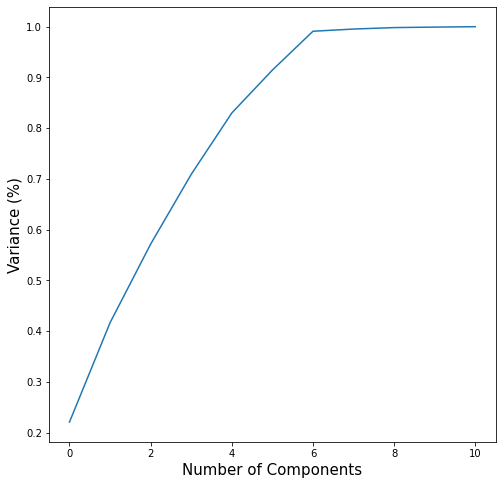

In [913]:
pca = PCA().fit(X_train_tr)
plt.figure(figsize=(8,8))
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('Number of Components', fontsize=(15))
plt.ylabel('Variance (%)', fontsize=(15)) # for each component
plt.show()

# Run PCA algorithm (the optimal number of components is wherever the elbow in the graph occurs)

In [914]:
pca = PCA(n_components = 6).fit(X_train_tr.to_numpy())
X_train_pca = pca.transform(X_train_tr.to_numpy())
X_test_pca = pca.transform(X_test_tr.to_numpy())

# Model =======================================================================================

In [915]:
model = DecisionTreeClassifier(max_depth = 4, random_state = 0)
model.fit(X_train_pca, Y_train)

DecisionTreeClassifier(max_depth=4, random_state=0)

### Make predictions

In [916]:
Y_test_pred = pd.Series(model.predict(X_test_pca)).astype(int)
Y_train_pred = pd.Series(model.predict(X_train_pca)).astype(int)

In [917]:
report = classification_report(Y_test_pred, Y_test, target_names = ["be flat", "be long"], output_dict = True)
report = pd.DataFrame(report).T
print(report)
print("")

              precision    recall  f1-score     support
be flat        0.352113  0.555556  0.431034   45.000000
be long        0.756098  0.574074  0.652632  108.000000
accuracy       0.568627  0.568627  0.568627    0.568627
macro avg      0.554105  0.564815  0.541833  153.000000
weighted avg   0.637278  0.568627  0.587456  153.000000



### Tree diagram

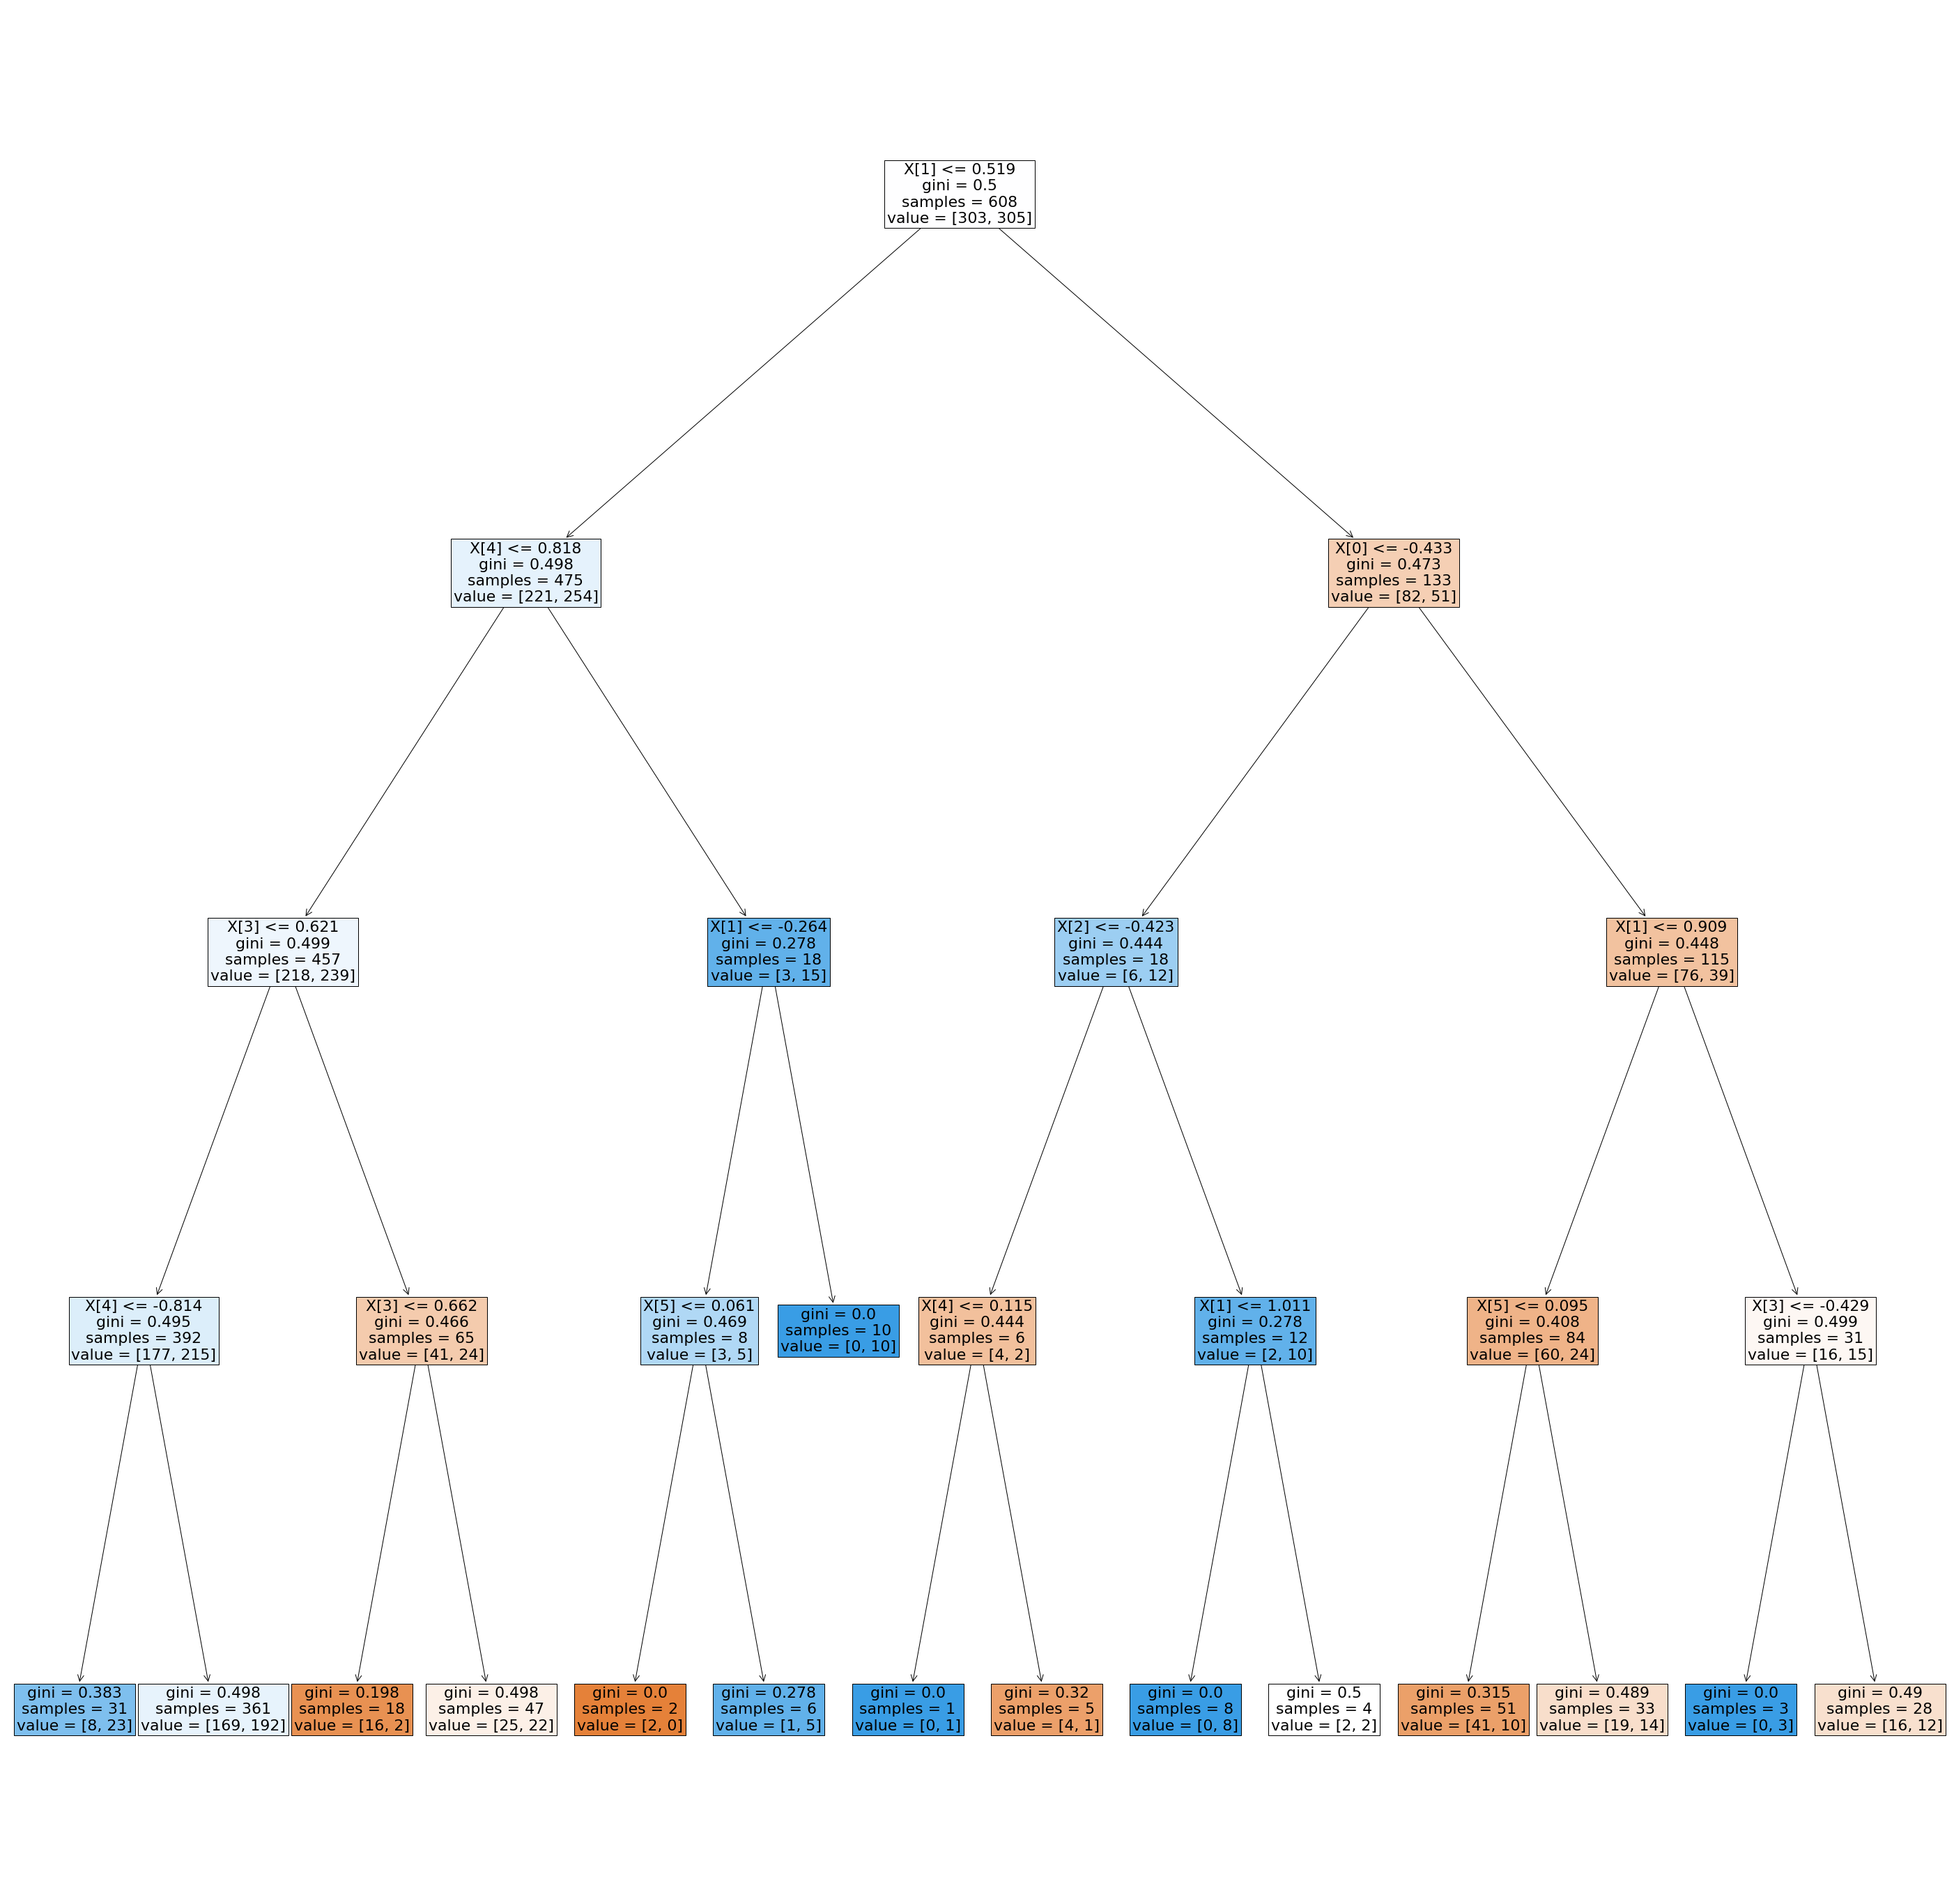

In [918]:
fig, ax = plt.subplots(figsize=(50,50))
plot_tree(model, ax = plt.axes(), fontsize=22, filled=True)
plt.show()

### Evaluate model and print metrics

In [919]:
metrics = \
[ \
[accuracy_score(Y_train, Y_train_pred), accuracy_score(Y_test, Y_test_pred)],
[precision_score(Y_train, Y_train_pred), precision_score(Y_test, Y_test_pred)], [recall_score(Y_train, Y_train_pred), recall_score(Y_test, Y_test_pred)],
[f1_score(Y_train, Y_train_pred), f1_score(Y_test, Y_test_pred)]
]
metrics = np.array(metrics) * 100

In [920]:
metrics = pd.DataFrame(metrics, columns = ["Training Set", "Test Set"])
metrics.insert(0, "Metric", ["Accuracy", "Precision", "Recall", "F1 Score"])
metrics.set_index("Metric", inplace = True)
print(metrics)

           Training Set   Test Set
Metric                            
Accuracy      60.361842  56.862745
Precision     57.619048  57.407407
Recall        79.344262  75.609756
F1 Score      66.758621  65.263158


# Target_4

In [921]:
df = pd.read_csv("UBS_Cleaned_Date.csv").iloc[2:, :].reset_index(drop = True)

In [922]:
# Basic Varaibles,  
df = df[["date", "Change_Close",
            "Wiki_RSI_Move", "Dow_Disparity_Move", 
            "Wiki_MAvg_Move", "Nas_Move",
            "Google_rs", "Google_ROC_Move", 
            "Nas_Disparity_Move", "Google_Disparity_s_Move",
            "Nas_Disparity_s_Move", "Google_gain",
            "Dow_Disparity_s_Move", "Google_RSI_Move", "Google_diff",
            "Dow_Move", "Google_Moment_2_s", "Dow_Rocp", "Nas_gain",
            "Wiki_Disparity_s", "Nas_MAvg_s_Move", "Google_Move",
            "Google_Disparity_s", "Google_total", "UBS_y", "Google_Rocp",
            "target_4"
            ]]
df.head()

,date,Change_Close,Wiki_RSI_Move,Dow_Disparity_Move,Wiki_MAvg_Move,Nas_Move,Google_rs,Google_ROC_Move,Nas_Disparity_Move,Google_Disparity_s_Move,...,Dow_Rocp,Nas_gain,Wiki_Disparity_s,Nas_MAvg_s_Move,Google_Move,Google_Disparity_s,Google_total,UBS_y,Google_Rocp,target_4
0,2019-01-04,0.110136,0,1,1,1,NaN,0,1,0,...,NaN,275.36,100.840149,1,0,99.457627,1467.0,1467,NaN,1
1,2019-01-07,0.025415,0,1,1,1,NaN,0,1,1,...,NaN,84.61,100.000000,1,1,100.000000,2017.0,2017,NaN,1
2,2019-01-08,-0.033888,0,0,1,1,NaN,0,0,1,...,NaN,73.53,101.004938,1,1,100.148515,2023.0,2023,NaN,0
3,2019-01-09,0.118609,0,0,1,1,NaN,0,0,0,...,44.81153,60.08,98.755994,1,0,99.370965,2001.0,2001,3.340568,1
4,2019-01-10,0.067777,0,1,0,1,NaN,0,1,1,...,18.24271,28.99,96.235749,1,1,100.165536,2017.0,2017,4.375271,1


In [923]:
pd.DataFrame(df.isna().sum()).T

,date,Change_Close,Wiki_RSI_Move,Dow_Disparity_Move,Wiki_MAvg_Move,Nas_Move,Google_rs,Google_ROC_Move,Nas_Disparity_Move,Google_Disparity_s_Move,...,Dow_Rocp,Nas_gain,Wiki_Disparity_s,Nas_MAvg_s_Move,Google_Move,Google_Disparity_s,Google_total,UBS_y,Google_Rocp,target_4
0,0,1,0,0,0,0,44,0,0,0,...,3,0,18,0,0,18,18,0,26,0


### Cleaning NaN issue

In [924]:
df = df.dropna() # to remove NaN
df = df[~(df.isin([np.inf, -np.inf]).any(axis=1))] # to remove inf

# Train/test split

In [925]:
X = df.iloc[:, 2:-1]
Y = df.iloc[:, -1]

In [926]:
def dataset_split(X, Y, test_size):
    ind = int((1 - test_size) * len(X))
    X_train = X.iloc[:ind, :]
    X_test = X.iloc[ind:, :]
    Y_train = Y.iloc[:ind]
    Y_test = Y.iloc[ind:]
    return X_train, X_test, Y_train, Y_test, ind

In [927]:
X_train, X_test, Y_train, Y_test, split_ind = dataset_split(X, Y, test_size = 0.2)

# Analyze the balance of the classification problem<br>
i.e. the percentage of 1s and 0s in the target

In [928]:
counts = Y_train.groupby(by = Y_train).count()
counts = pd.Series(counts)
print(counts)

target_4
0    288
1    320
Name: target_4, dtype: int64


# Feature scaling

In [929]:
# Scale the data (prices) from 0 to 1

scaler = MinMaxScaler()
X_train_sc = pd.DataFrame(scaler.fit_transform(X_train), columns = X.columns)
X_test_sc = pd.DataFrame(scaler.transform(X_test), columns = X.columns)

In [930]:
# Each feature's correlation with every other feature

corr_matrix = X_train_sc.corr()

In [931]:
#Each feature's correlation with the target variable

feature_target_corr = X_train_sc.corrwith(Y_train, method = "pearson")
feature_target_corr = feature_target_corr.sort_values(ascending = False)

# Select features based on correlation

In [932]:
all_features = X.columns.to_list()
selected_features = all_features[:]
for i in range(0, len(corr_matrix)):
    for j in range(i, len(corr_matrix)):
        # Process every pair of features
        corr = corr_matrix.iloc[i, j] 
        if abs(corr) > 0.5 and corr != 1:
            feature1 = all_features[i]
            feature2 = all_features[j]
            
            # Out of the two features in the current pair, remove the feature that
            # is less correlated with the target variable
            corr1 = feature_target_corr[feature1]
            corr2 = feature_target_corr[feature2]
            try:
                if abs(corr1) < abs(corr2):
                    selected_features.remove(feature1)
                    print("Removed from list of features:", feature1)
                else:
                    selected_features.remove(feature2)
                    print("Removed from list of features:", feature2)
            except ValueError:
                # Catch the error just in case we're trying to remove a feature
                # that's already been removed
                pass

Removed from list of features: Nas_Disparity_Move
Removed from list of features: Dow_Disparity_s_Move
Removed from list of features: Dow_Disparity_Move
Removed from list of features: Nas_Disparity_s_Move
Removed from list of features: Nas_Move
Removed from list of features: Nas_gain
Removed from list of features: Google_gain
Removed from list of features: Google_rs
Removed from list of features: Google_total
Removed from list of features: UBS_y
Removed from list of features: Google_Move
Removed from list of features: Google_diff
Removed from list of features: Google_Disparity_s


In [933]:
# After our function, X_train_sc, removes the least correlated fetures from X_train_sc to target_1, we proceed with the training

X_train_tr = X_train_sc[selected_features]
X_test_tr = X_test_sc[selected_features]

In [934]:
corr_matrix_selected_features = X_train_tr.corr()

# Plot number of components vs. explained variance for PCA algorithm

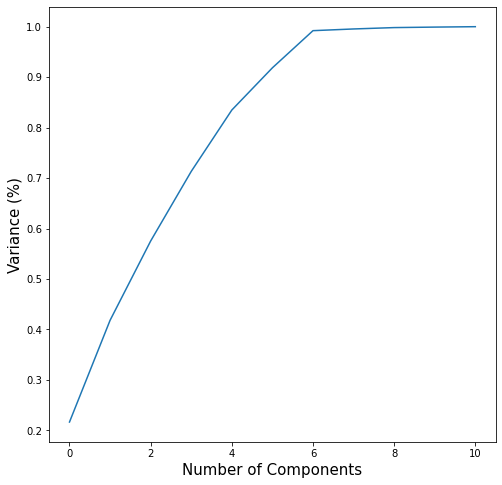

In [935]:
pca = PCA().fit(X_train_tr)
plt.figure(figsize=(8,8))
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('Number of Components', fontsize=(15))
plt.ylabel('Variance (%)', fontsize=(15)) # for each component
plt.show()

# Run PCA algorithm (the optimal number of components is wherever the elbow in the graph occurs)

In [936]:
pca = PCA(n_components = 6).fit(X_train_tr.to_numpy())
X_train_pca = pca.transform(X_train_tr.to_numpy())
X_test_pca = pca.transform(X_test_tr.to_numpy())

# Model =======================================================================================

In [937]:
model = DecisionTreeClassifier(max_depth = 4, random_state = 0)
model.fit(X_train_pca, Y_train)

DecisionTreeClassifier(max_depth=4, random_state=0)

### Make predictions

In [938]:
Y_test_pred = pd.Series(model.predict(X_test_pca)).astype(int)
Y_train_pred = pd.Series(model.predict(X_train_pca)).astype(int)

In [939]:
report = classification_report(Y_test_pred, Y_test, target_names = ["be flat", "be long"], output_dict = True)
report = pd.DataFrame(report).T
print(report)
print("")

              precision    recall  f1-score     support
be flat        0.571429  0.588235  0.579710   68.000000
be long        0.662651  0.647059  0.654762   85.000000
accuracy       0.620915  0.620915  0.620915    0.620915
macro avg      0.617040  0.617647  0.617236  153.000000
weighted avg   0.622107  0.620915  0.621406  153.000000



### Tree diagram

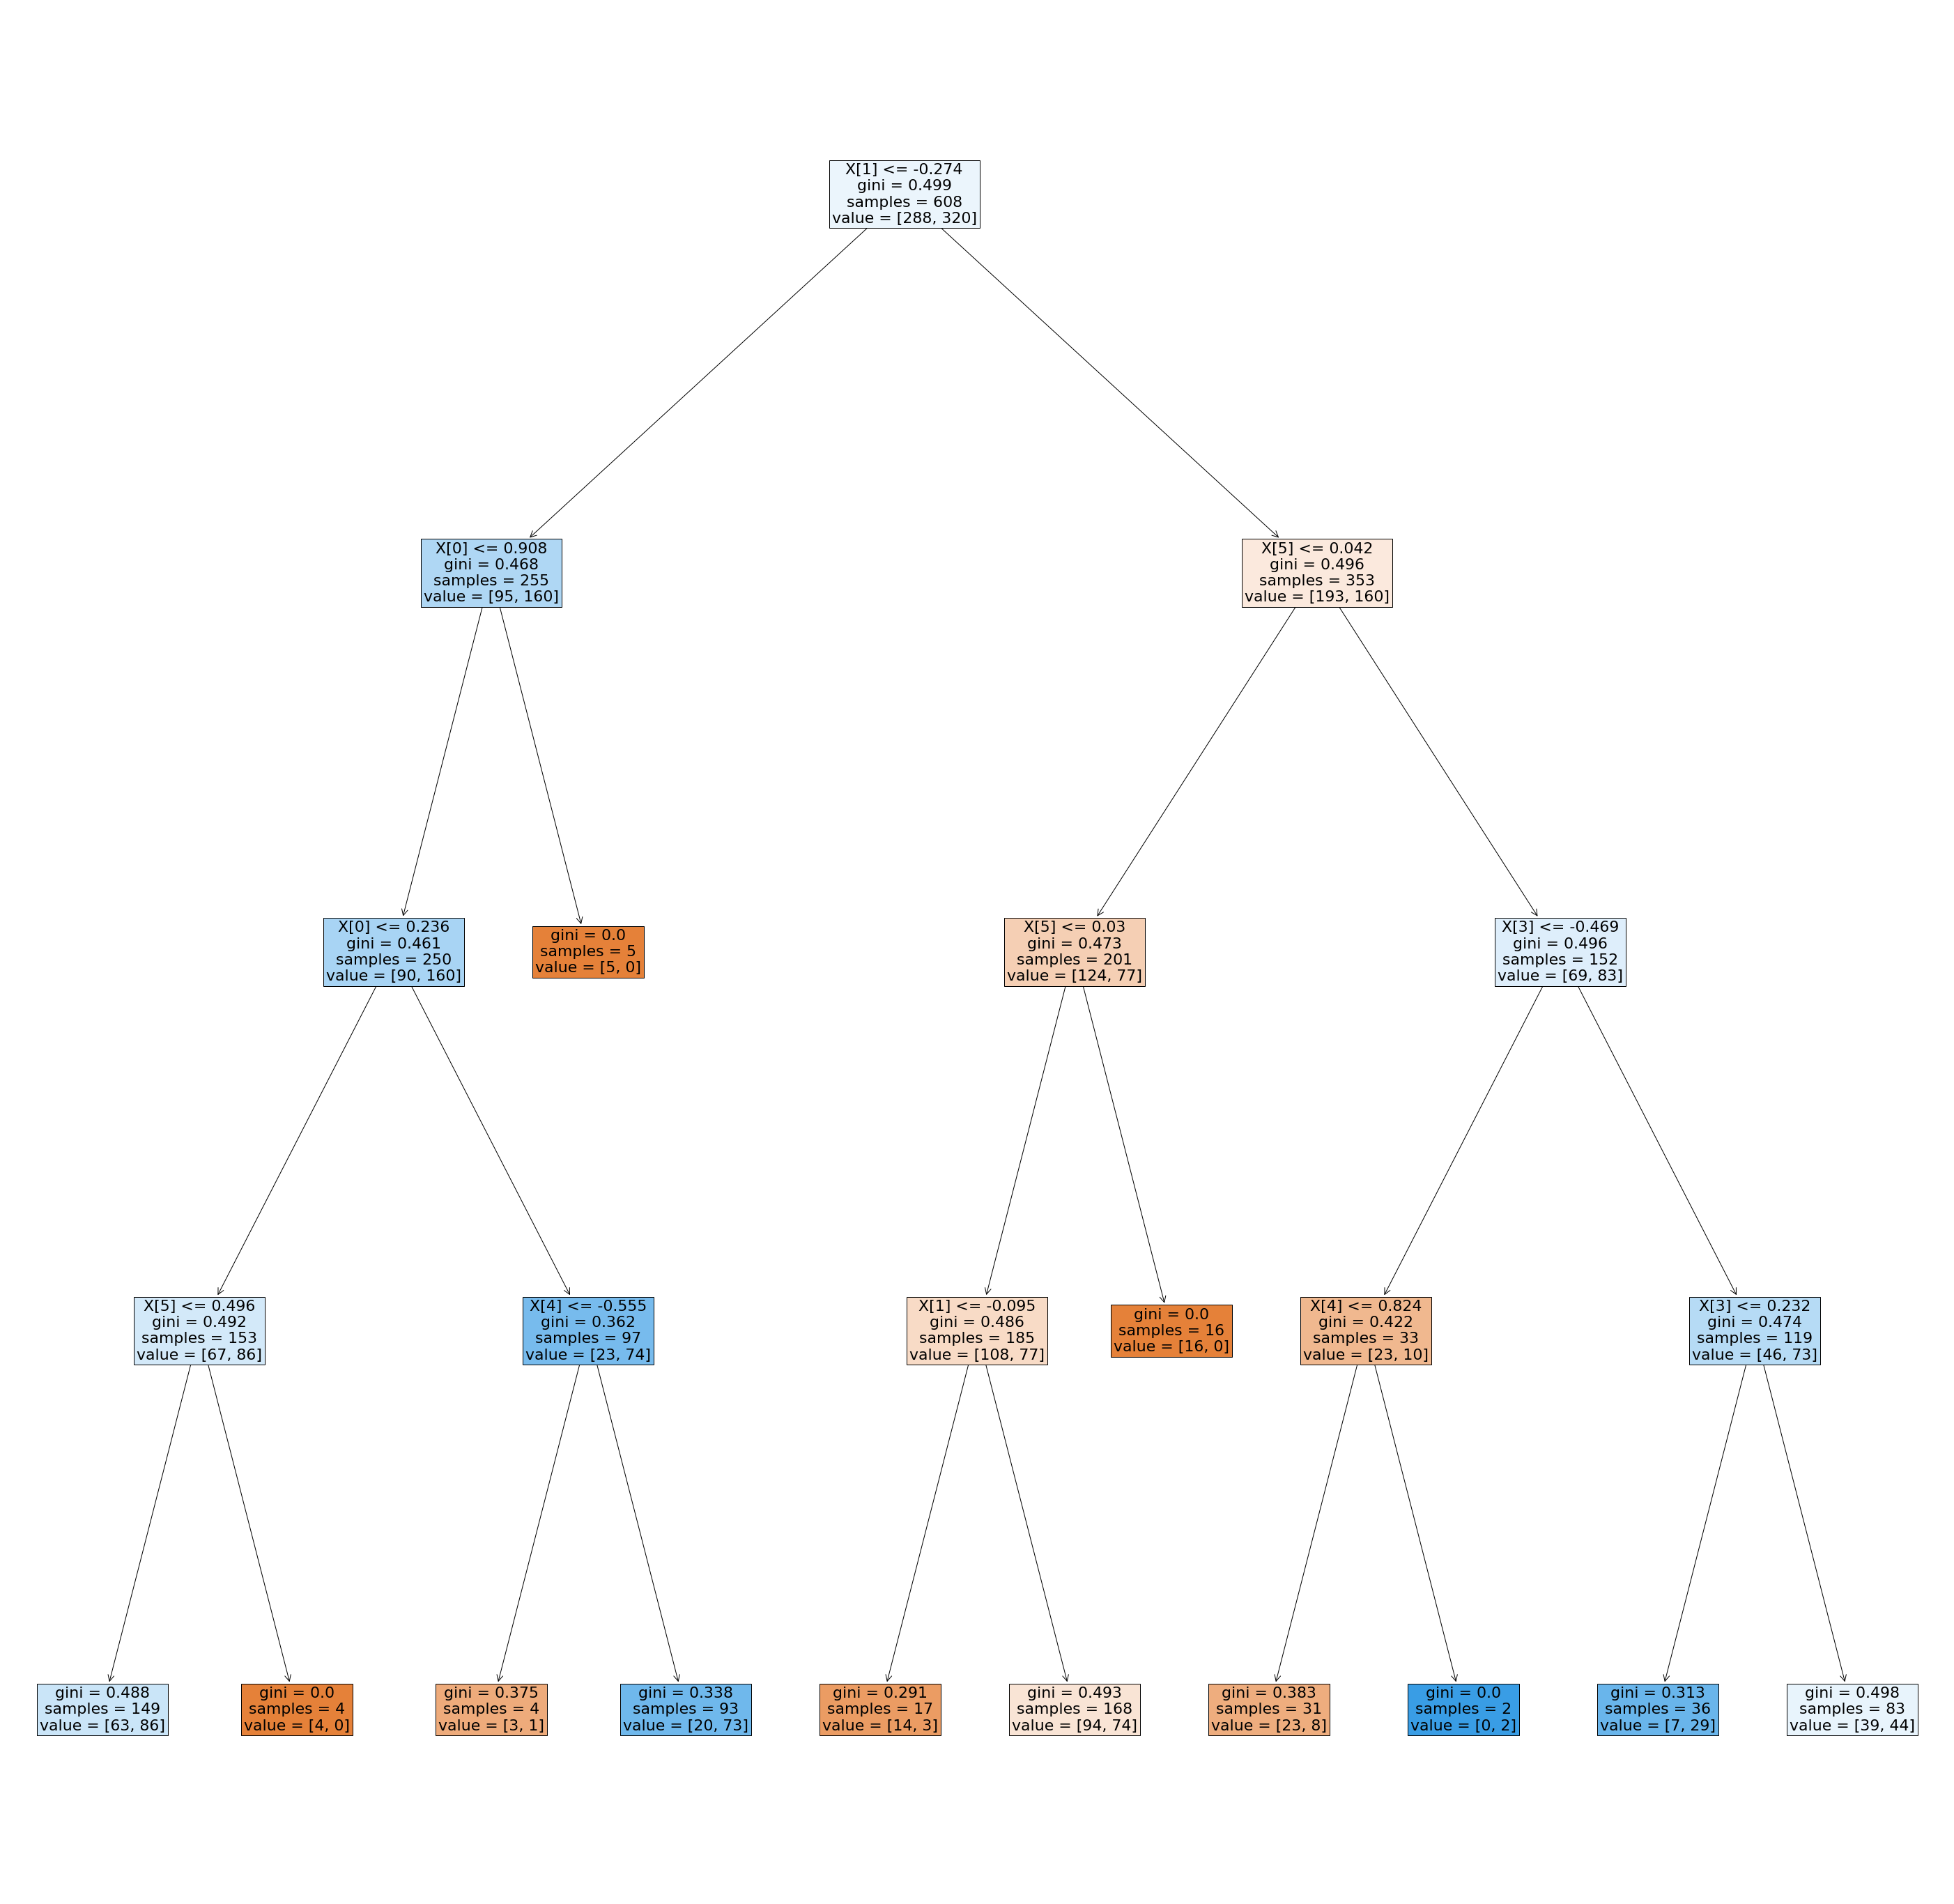

In [940]:
fig, ax = plt.subplots(figsize=(50,50))
plot_tree(model, ax = plt.axes(), fontsize=22, filled=True)
plt.show()

### Evaluate model and print metrics

In [941]:
metrics = \
[ \
[accuracy_score(Y_train, Y_train_pred), accuracy_score(Y_test, Y_test_pred)],
[precision_score(Y_train, Y_train_pred), precision_score(Y_test, Y_test_pred)], [recall_score(Y_train, Y_train_pred), recall_score(Y_test, Y_test_pred)],
[f1_score(Y_train, Y_train_pred), f1_score(Y_test, Y_test_pred)]
]
metrics = np.array(metrics) * 100

In [942]:
metrics = pd.DataFrame(metrics, columns = ["Training Set", "Test Set"])
metrics.insert(0, "Metric", ["Accuracy", "Precision", "Recall", "F1 Score"])
metrics.set_index("Metric", inplace = True)
print(metrics)

           Training Set   Test Set
Metric                            
Accuracy      64.638158  62.091503
Precision     64.462810  64.705882
Recall        73.125000  66.265060
F1 Score      68.521230  65.476190


# Target_5

In [943]:
df = pd.read_csv("UBS_Cleaned_Date.csv").iloc[2:, :].reset_index(drop = True)

In [944]:
# Basic Varibles
df = df[["date", "Change_Close",
            "Wiki_RSI_Move", "Dow_Disparity_Move", 
            "Wiki_MAvg_Move", "Nas_Move",
            "Google_rs", "Google_ROC_Move", 
            "Nas_Disparity_Move", "Google_Disparity_s_Move",
            "Nas_Disparity_s_Move", "Google_gain",
            "Dow_Disparity_s_Move", "Google_RSI_Move", "Google_diff",
            "Dow_Move", "Google_Moment_2_s", "Dow_Rocp", "Nas_gain",
            "Wiki_Disparity_s", "Nas_MAvg_s_Move", "Google_Move",
            "Google_Disparity_s", "Google_total", "UBS_y", "Google_Rocp",
            "target_5"
            ]]
df.head()

,date,Change_Close,Wiki_RSI_Move,Dow_Disparity_Move,Wiki_MAvg_Move,Nas_Move,Google_rs,Google_ROC_Move,Nas_Disparity_Move,Google_Disparity_s_Move,...,Dow_Rocp,Nas_gain,Wiki_Disparity_s,Nas_MAvg_s_Move,Google_Move,Google_Disparity_s,Google_total,UBS_y,Google_Rocp,target_5
0,2019-01-04,0.110136,0,1,1,1,NaN,0,1,0,...,NaN,275.36,100.840149,1,0,99.457627,1467.0,1467,NaN,1
1,2019-01-07,0.025415,0,1,1,1,NaN,0,1,1,...,NaN,84.61,100.000000,1,1,100.000000,2017.0,2017,NaN,0
2,2019-01-08,-0.033888,0,0,1,1,NaN,0,0,1,...,NaN,73.53,101.004938,1,1,100.148515,2023.0,2023,NaN,1
3,2019-01-09,0.118609,0,0,1,1,NaN,0,0,0,...,44.81153,60.08,98.755994,1,0,99.370965,2001.0,2001,3.340568,0
4,2019-01-10,0.067777,0,1,0,1,NaN,0,1,1,...,18.24271,28.99,96.235749,1,1,100.165536,2017.0,2017,4.375271,0


In [945]:
pd.DataFrame(df.isna().sum()).T

,date,Change_Close,Wiki_RSI_Move,Dow_Disparity_Move,Wiki_MAvg_Move,Nas_Move,Google_rs,Google_ROC_Move,Nas_Disparity_Move,Google_Disparity_s_Move,...,Dow_Rocp,Nas_gain,Wiki_Disparity_s,Nas_MAvg_s_Move,Google_Move,Google_Disparity_s,Google_total,UBS_y,Google_Rocp,target_5
0,0,1,0,0,0,0,44,0,0,0,...,3,0,18,0,0,18,18,0,26,0


### Cleaning NaN issue

In [946]:
df = df.dropna() # to remove NaN
df = df[~(df.isin([np.inf, -np.inf]).any(axis=1))] # to remove inf

# Train/test split

In [947]:
X = df.iloc[:, 2:-1]
Y = df.iloc[:, -1]

In [948]:
def dataset_split(X, Y, test_size):
    ind = int((1 - test_size) * len(X))
    X_train = X.iloc[:ind, :]
    X_test = X.iloc[ind:, :]
    Y_train = Y.iloc[:ind]
    Y_test = Y.iloc[ind:]
    return X_train, X_test, Y_train, Y_test, ind

In [949]:
X_train, X_test, Y_train, Y_test, split_ind = dataset_split(X, Y, test_size = 0.2)

# Analyze the balance of the classification problem<br>
i.e. the percentage of 1s and 0s in the target

In [950]:
counts = Y_train.groupby(by = Y_train).count()
counts = pd.Series(counts)
print(counts)

target_5
0    314
1    294
Name: target_5, dtype: int64


# Feature scaling

In [951]:
# Scale the data (prices) from 0 to 1

scaler = MinMaxScaler()
X_train_sc = pd.DataFrame(scaler.fit_transform(X_train), columns = X.columns)
X_test_sc = pd.DataFrame(scaler.transform(X_test), columns = X.columns)

In [952]:
# Each feature's correlation with every other feature

corr_matrix = X_train_sc.corr()

In [953]:
#Each feature's correlation with the target variable

feature_target_corr = X_train_sc.corrwith(Y_train, method = "pearson")
feature_target_corr = feature_target_corr.sort_values(ascending = False)

# Select features based on correlation

In [954]:
all_features = X.columns.to_list()
selected_features = all_features[:]
for i in range(0, len(corr_matrix)):
    for j in range(i, len(corr_matrix)):
        # Process every pair of features
        corr = corr_matrix.iloc[i, j] 
        if abs(corr) > 0.5 and corr != 1:
            feature1 = all_features[i]
            feature2 = all_features[j]
            
            # Out of the two features in the current pair, remove the feature that
            # is less correlated with the target variable
            corr1 = feature_target_corr[feature1]
            corr2 = feature_target_corr[feature2]
            try:
                if abs(corr1) < abs(corr2):
                    selected_features.remove(feature1)
                    print("Removed from list of features:", feature1)
                else:
                    selected_features.remove(feature2)
                    print("Removed from list of features:", feature2)
            except ValueError:
                # Catch the error just in case we're trying to remove a feature
                # that's already been removed
                pass

Removed from list of features: Dow_Disparity_Move
Removed from list of features: Dow_Disparity_s_Move
Removed from list of features: Nas_Move
Removed from list of features: Google_rs
Removed from list of features: Google_total
Removed from list of features: UBS_y
Removed from list of features: Google_ROC_Move
Removed from list of features: Nas_Disparity_s_Move
Removed from list of features: Nas_Disparity_Move
Removed from list of features: Google_diff
Removed from list of features: Google_Disparity_s_Move
Removed from list of features: Google_gain
Removed from list of features: Google_Disparity_s


In [955]:
# After our function, X_train_sc, removes the least correlated fetures from X_train_sc to target_1, we proceed with the training

X_train_tr = X_train_sc[selected_features]
X_test_tr = X_test_sc[selected_features]

In [956]:
corr_matrix_selected_features = X_train_tr.corr()

# Plot number of components vs. explained variance for PCA algorithm

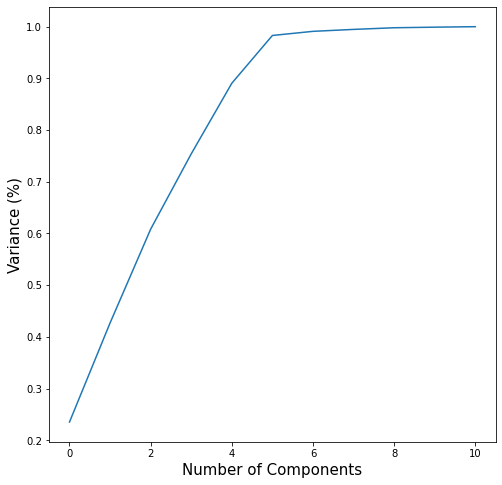

In [957]:
pca = PCA().fit(X_train_tr)
plt.figure(figsize=(8,8))
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('Number of Components', fontsize=(15))
plt.ylabel('Variance (%)', fontsize=(15)) # for each component
plt.show()

# Run PCA algorithm (the optimal number of components is wherever the elbow in the graph occurs)

In [958]:
pca = PCA(n_components = 6).fit(X_train_tr.to_numpy())
X_train_pca = pca.transform(X_train_tr.to_numpy())
X_test_pca = pca.transform(X_test_tr.to_numpy())

# Model =======================================================================================

In [959]:
model = DecisionTreeClassifier(max_depth = 4, random_state = 0)
model.fit(X_train_pca, Y_train)

DecisionTreeClassifier(max_depth=4, random_state=0)

### Make predictions

In [960]:
Y_test_pred = pd.Series(model.predict(X_test_pca)).astype(int)
Y_train_pred = pd.Series(model.predict(X_train_pca)).astype(int)

In [961]:
report = classification_report(Y_test_pred, Y_test, target_names = ["be flat", "be long"], output_dict = True)
report = pd.DataFrame(report).T
print(report)
print("")

              precision    recall  f1-score     support
be flat        0.762500  0.559633  0.645503  109.000000
be long        0.342466  0.568182  0.427350   44.000000
accuracy       0.562092  0.562092  0.562092    0.562092
macro avg      0.552483  0.563907  0.536427  153.000000
weighted avg   0.641706  0.562092  0.582766  153.000000



### Tree diagram

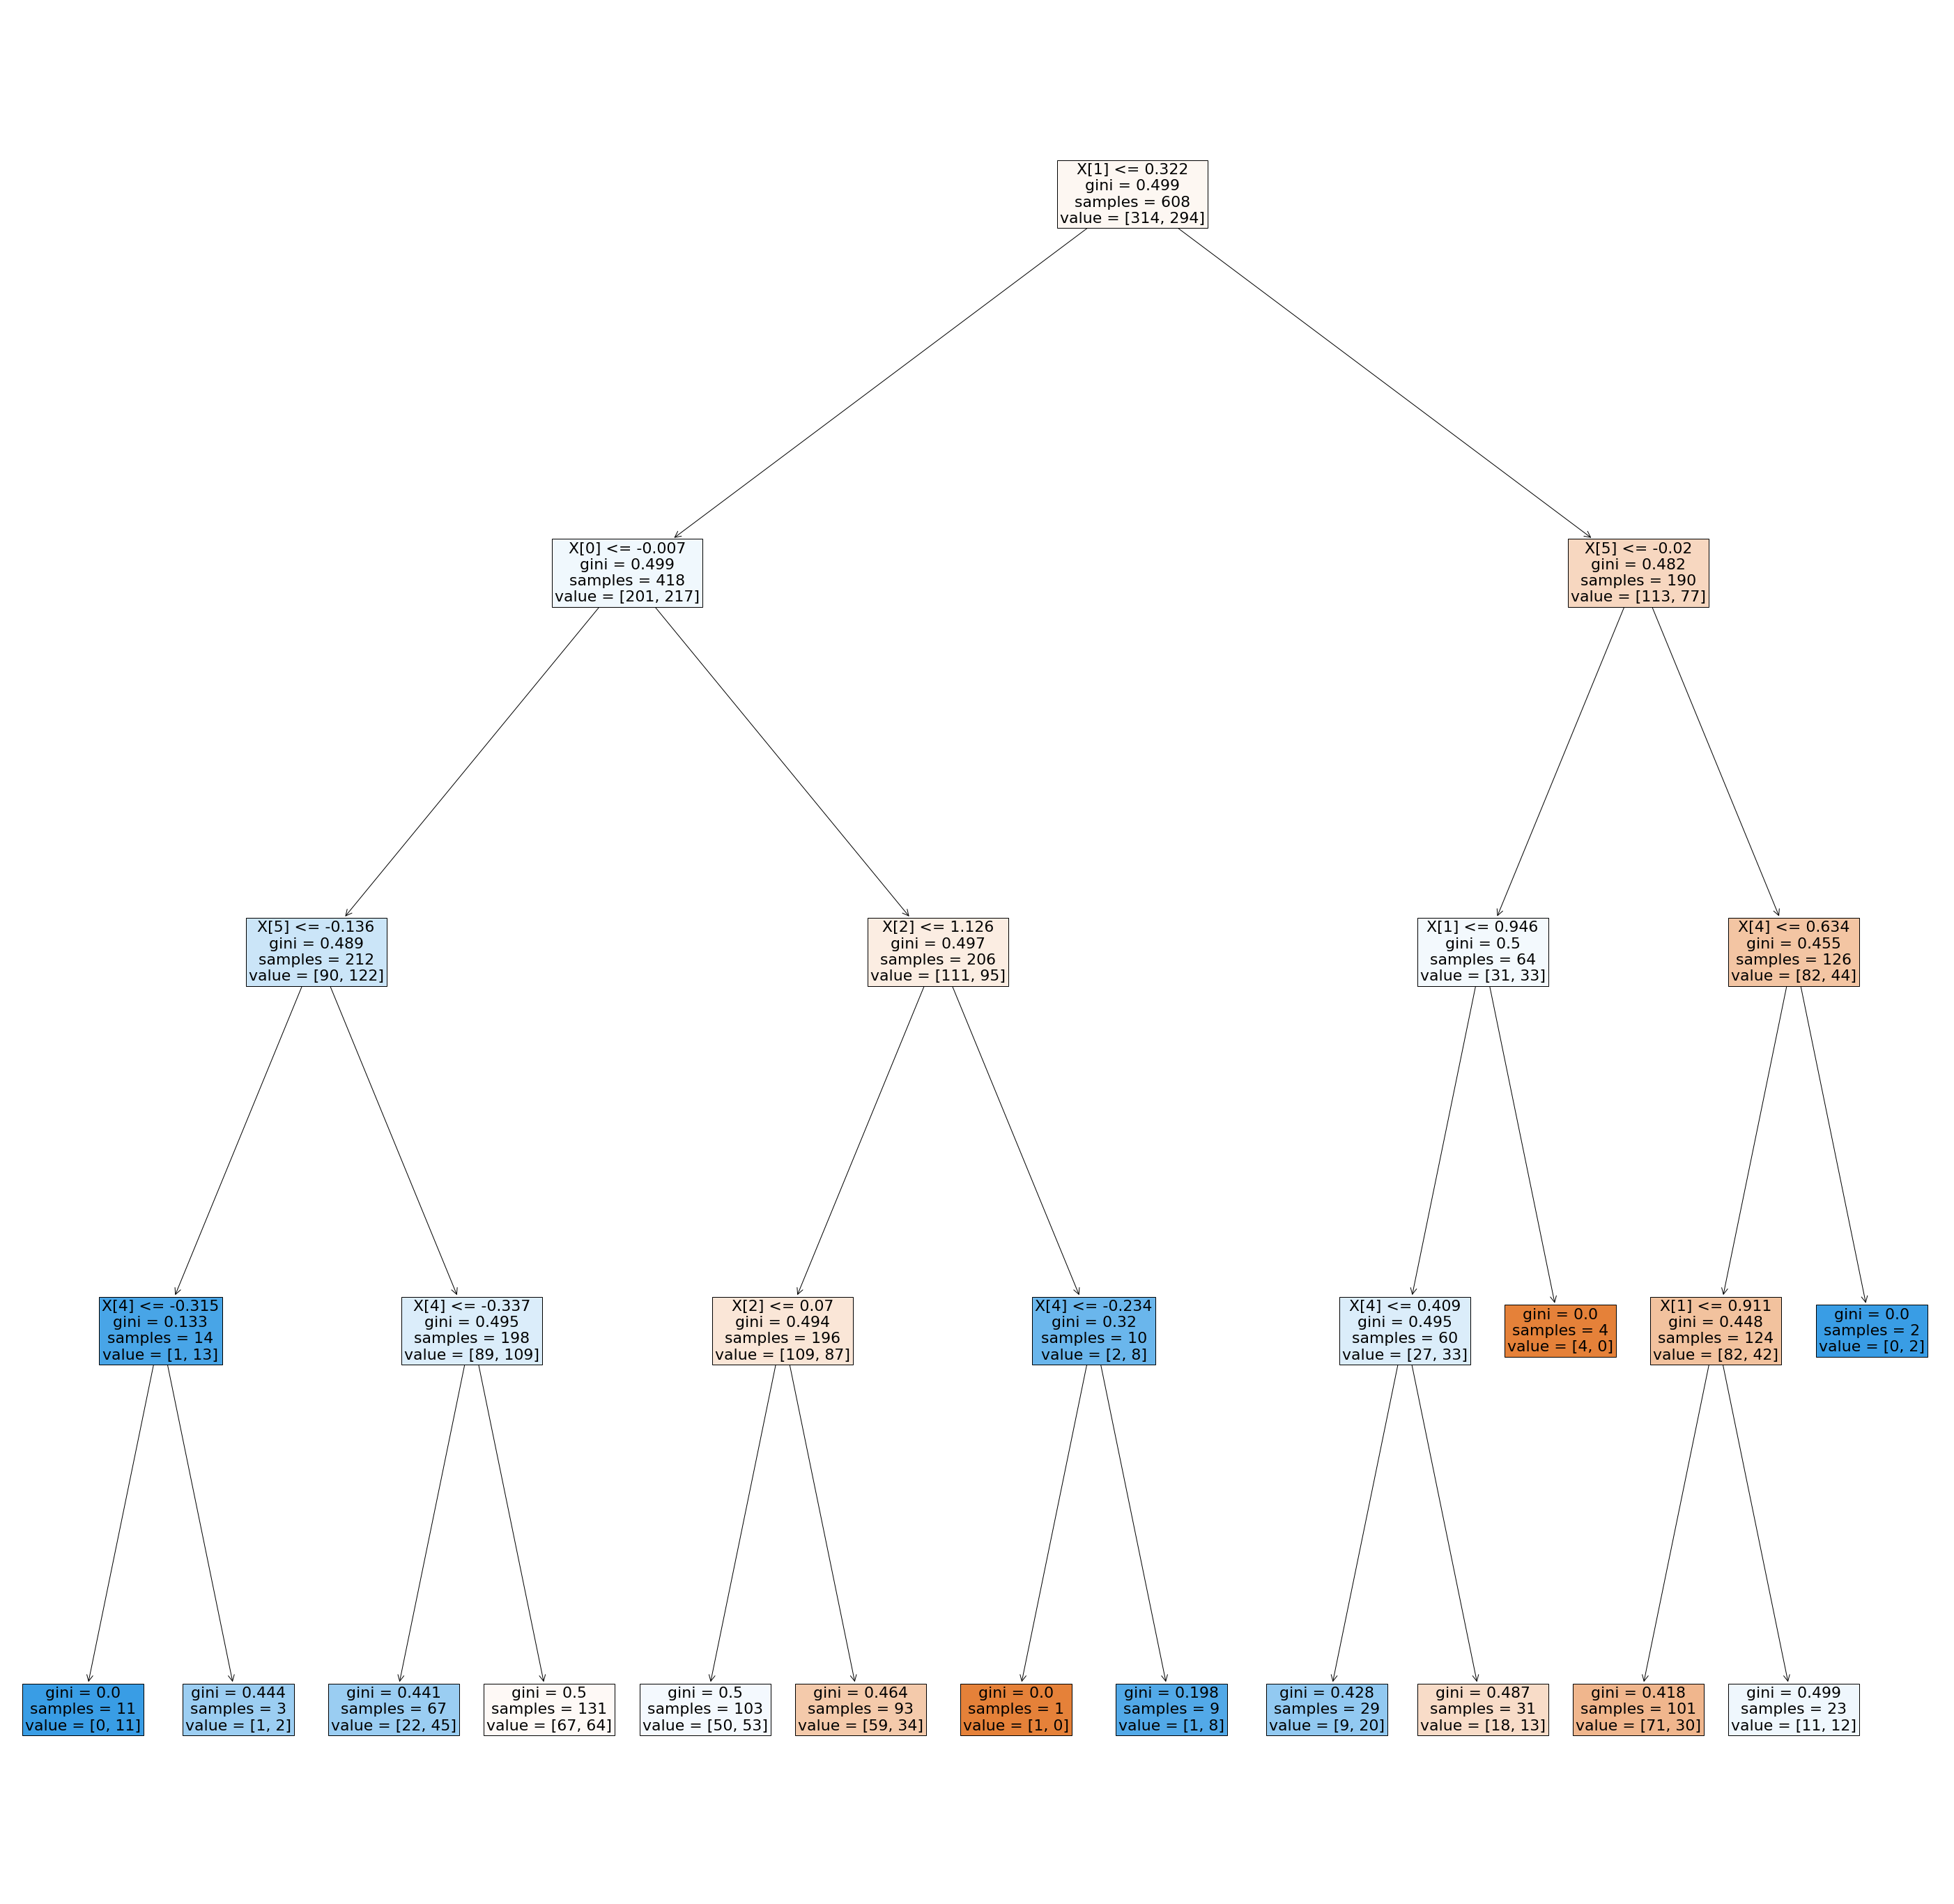

In [962]:
fig, ax = plt.subplots(figsize=(50,50))
plot_tree(model, ax = plt.axes(), fontsize=22, filled=True)
plt.show()

### Evaluate model and print metrics

In [963]:
metrics = \
[ \
[accuracy_score(Y_train, Y_train_pred), accuracy_score(Y_test, Y_test_pred)],
[precision_score(Y_train, Y_train_pred), precision_score(Y_test, Y_test_pred)], [recall_score(Y_train, Y_train_pred), recall_score(Y_test, Y_test_pred)],
[f1_score(Y_train, Y_train_pred), f1_score(Y_test, Y_test_pred)]
]
metrics = np.array(metrics) * 100

In [964]:
metrics = pd.DataFrame(metrics, columns = ["Training Set", "Test Set"])
metrics.insert(0, "Metric", ["Accuracy", "Precision", "Recall", "F1 Score"])
metrics.set_index("Metric", inplace = True)
print(metrics)

           Training Set   Test Set
Metric                            
Accuracy      61.348684  56.209150
Precision     61.943320  56.818182
Recall        52.040816  34.246575
F1 Score      56.561922  42.735043
